In [1]:
import numpy as np
import matrix_generation as mat
import display
from signature import lead_matrix
from kuramoto import Kuramoto
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

%load_ext autoreload
%autoreload 2

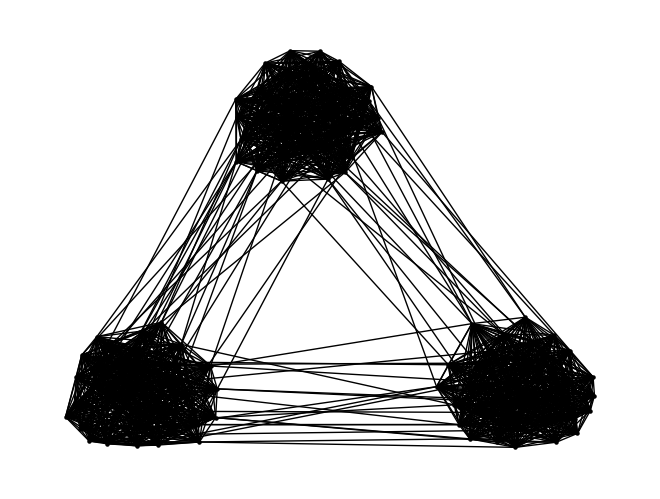

In [2]:
seed = 1998
N = 99
n = 3
N_c = N//n

fc_SBM_mat = mat.fully_connected_SBM(N, n, seed=seed)
display.graph(fc_SBM_mat)

## Collapsed KSBM Dynamics & Associated Lead Matrices

In [3]:
t = np.concatenate((np.linspace(0, 1, 250), np.linspace(1, 10, 251)[1:]))
kappa = 100
A = (kappa/N)*fc_SBM_mat
freq = 2*np.array([1, 1, 1])/n

model = Kuramoto(N, A, mu=0, sigma=0.1, frequencies=np.repeat(freq, N_c), seed=seed)
sol = model.simulate(t)

(0.0, 499.0)

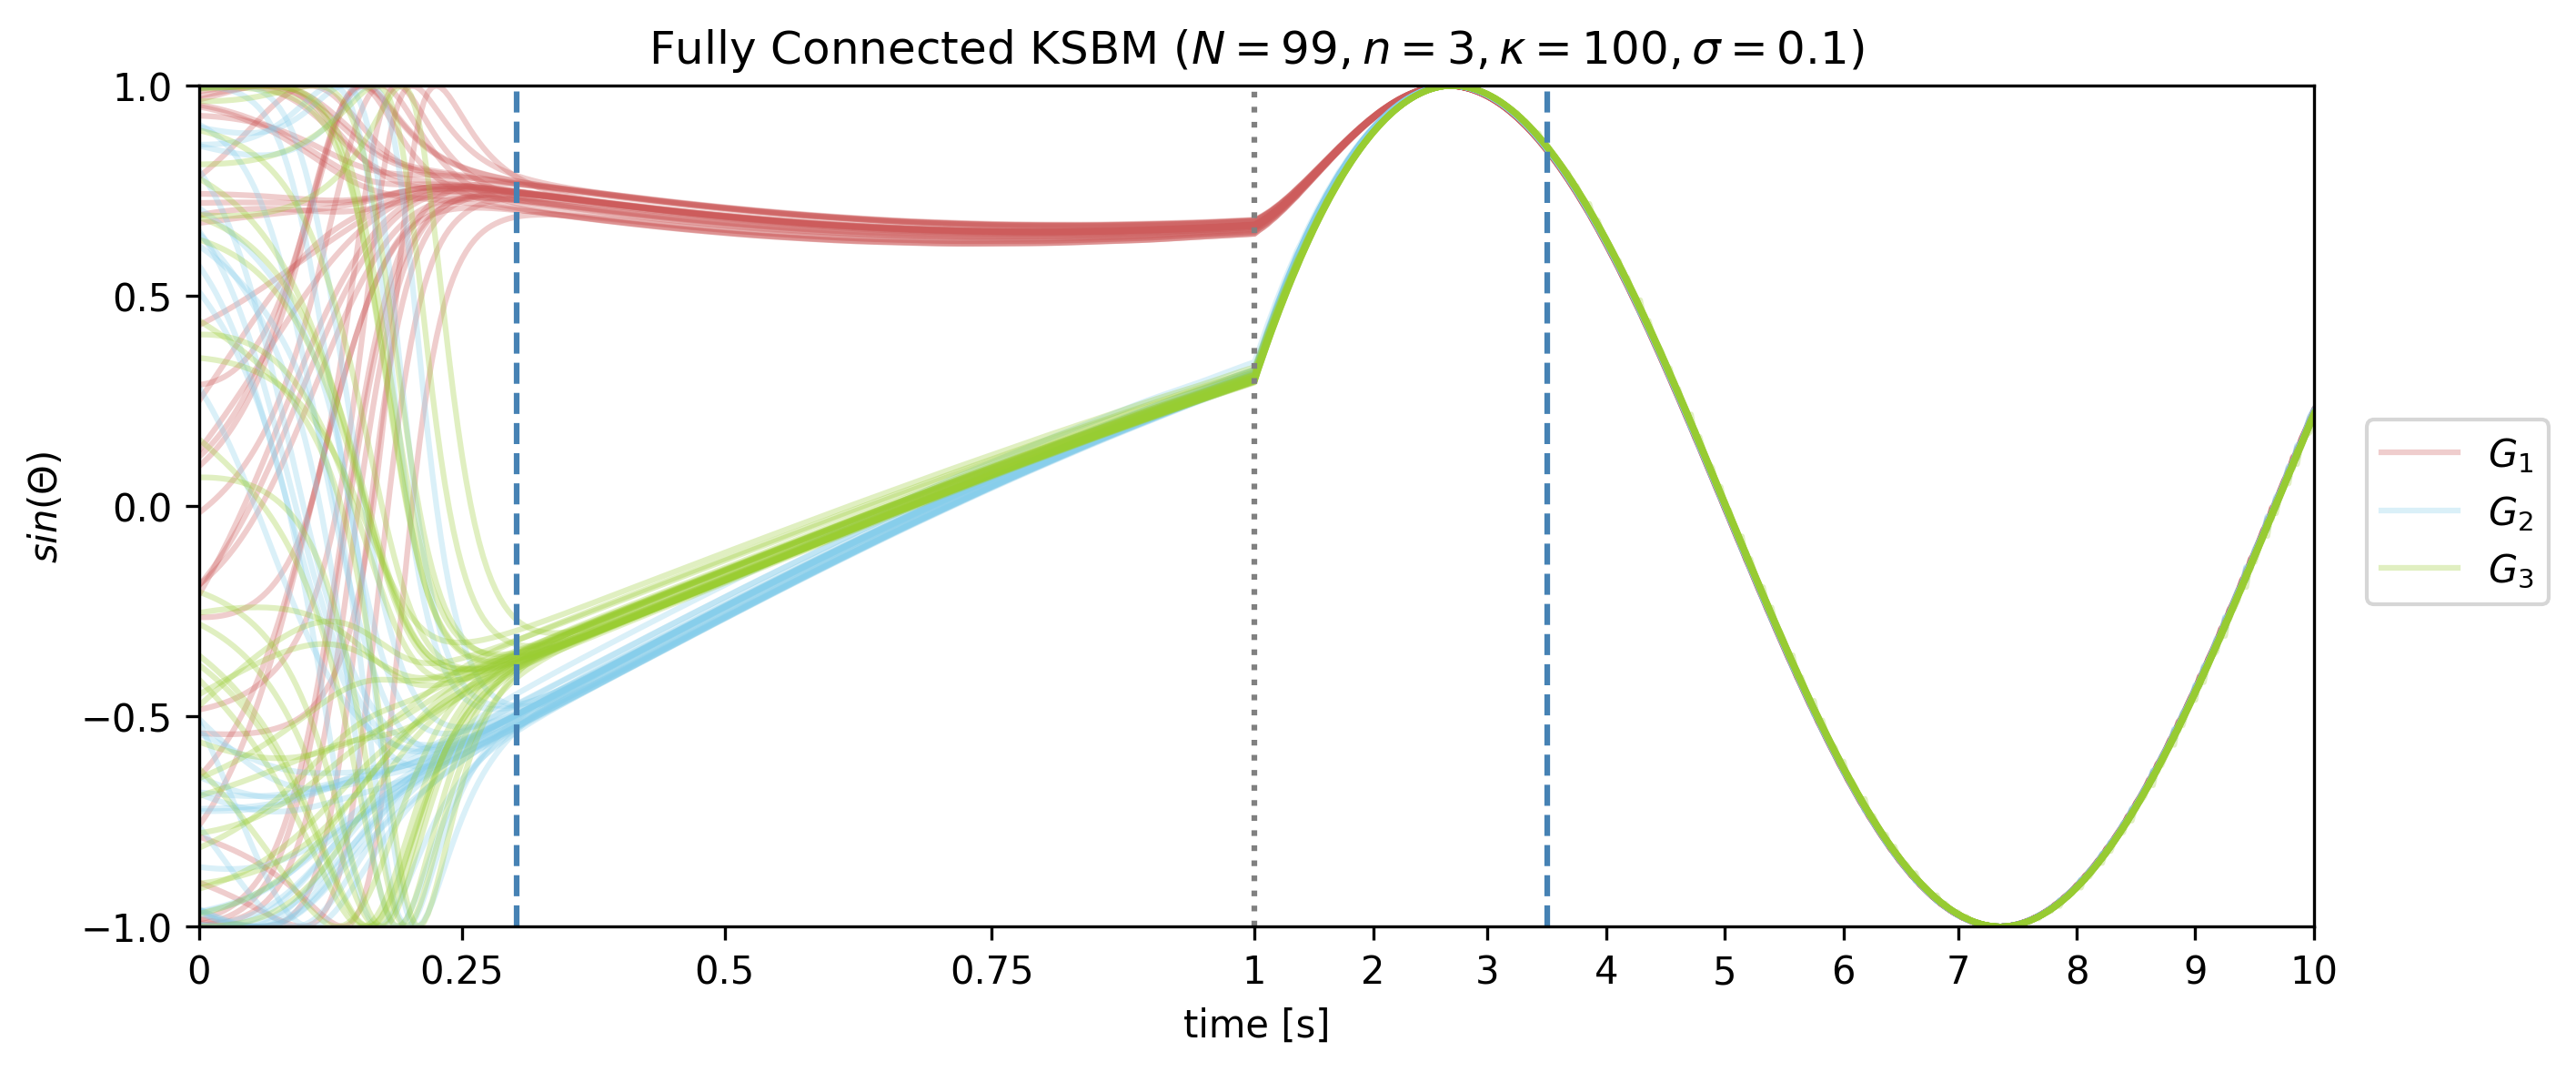

In [4]:
plt.figure(figsize=(10, 4), dpi=300)
colors = ['indianred', 'skyblue', 'yellowgreen']
t_idx = range(len(t))
for i in range(n):
    for j in range(N_c):
        if j == 0:
            plt.plot(t_idx, np.sin(sol.y[i*N_c]), label=r'$G_{}$'.format(i+1), c=colors[i], alpha=10/N_c)
        else:
            plt.plot(t_idx, np.sin(sol.y[i*N_c + j]), c=colors[i], alpha=10/N_c)
            
            
plt.vlines([249], -1, 1, colors='gray', linestyles='dotted')
plt.vlines([int(250*(0.3)), 250 + int(250*(2.5/9))-1], -1, 1, colors='steelblue', linestyles='dashed')
            
plt.xlabel('time [s]')
plt.ylabel(r'$sin(\Theta)$')
plt.legend(bbox_to_anchor=(1.12, .625))


plt.xticks([0, 62, 124, 187, 249, 277, 304, 332, 360, 388, 415, 443, 471, 499], [0, 0.25, 0.5, 0.75, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.title(r'Fully Connected KSBM ($N=99,n=3,\kappa=100,\sigma=0.1$)')
plt.ylim(-1, 1)
plt.xlim(0, 499)

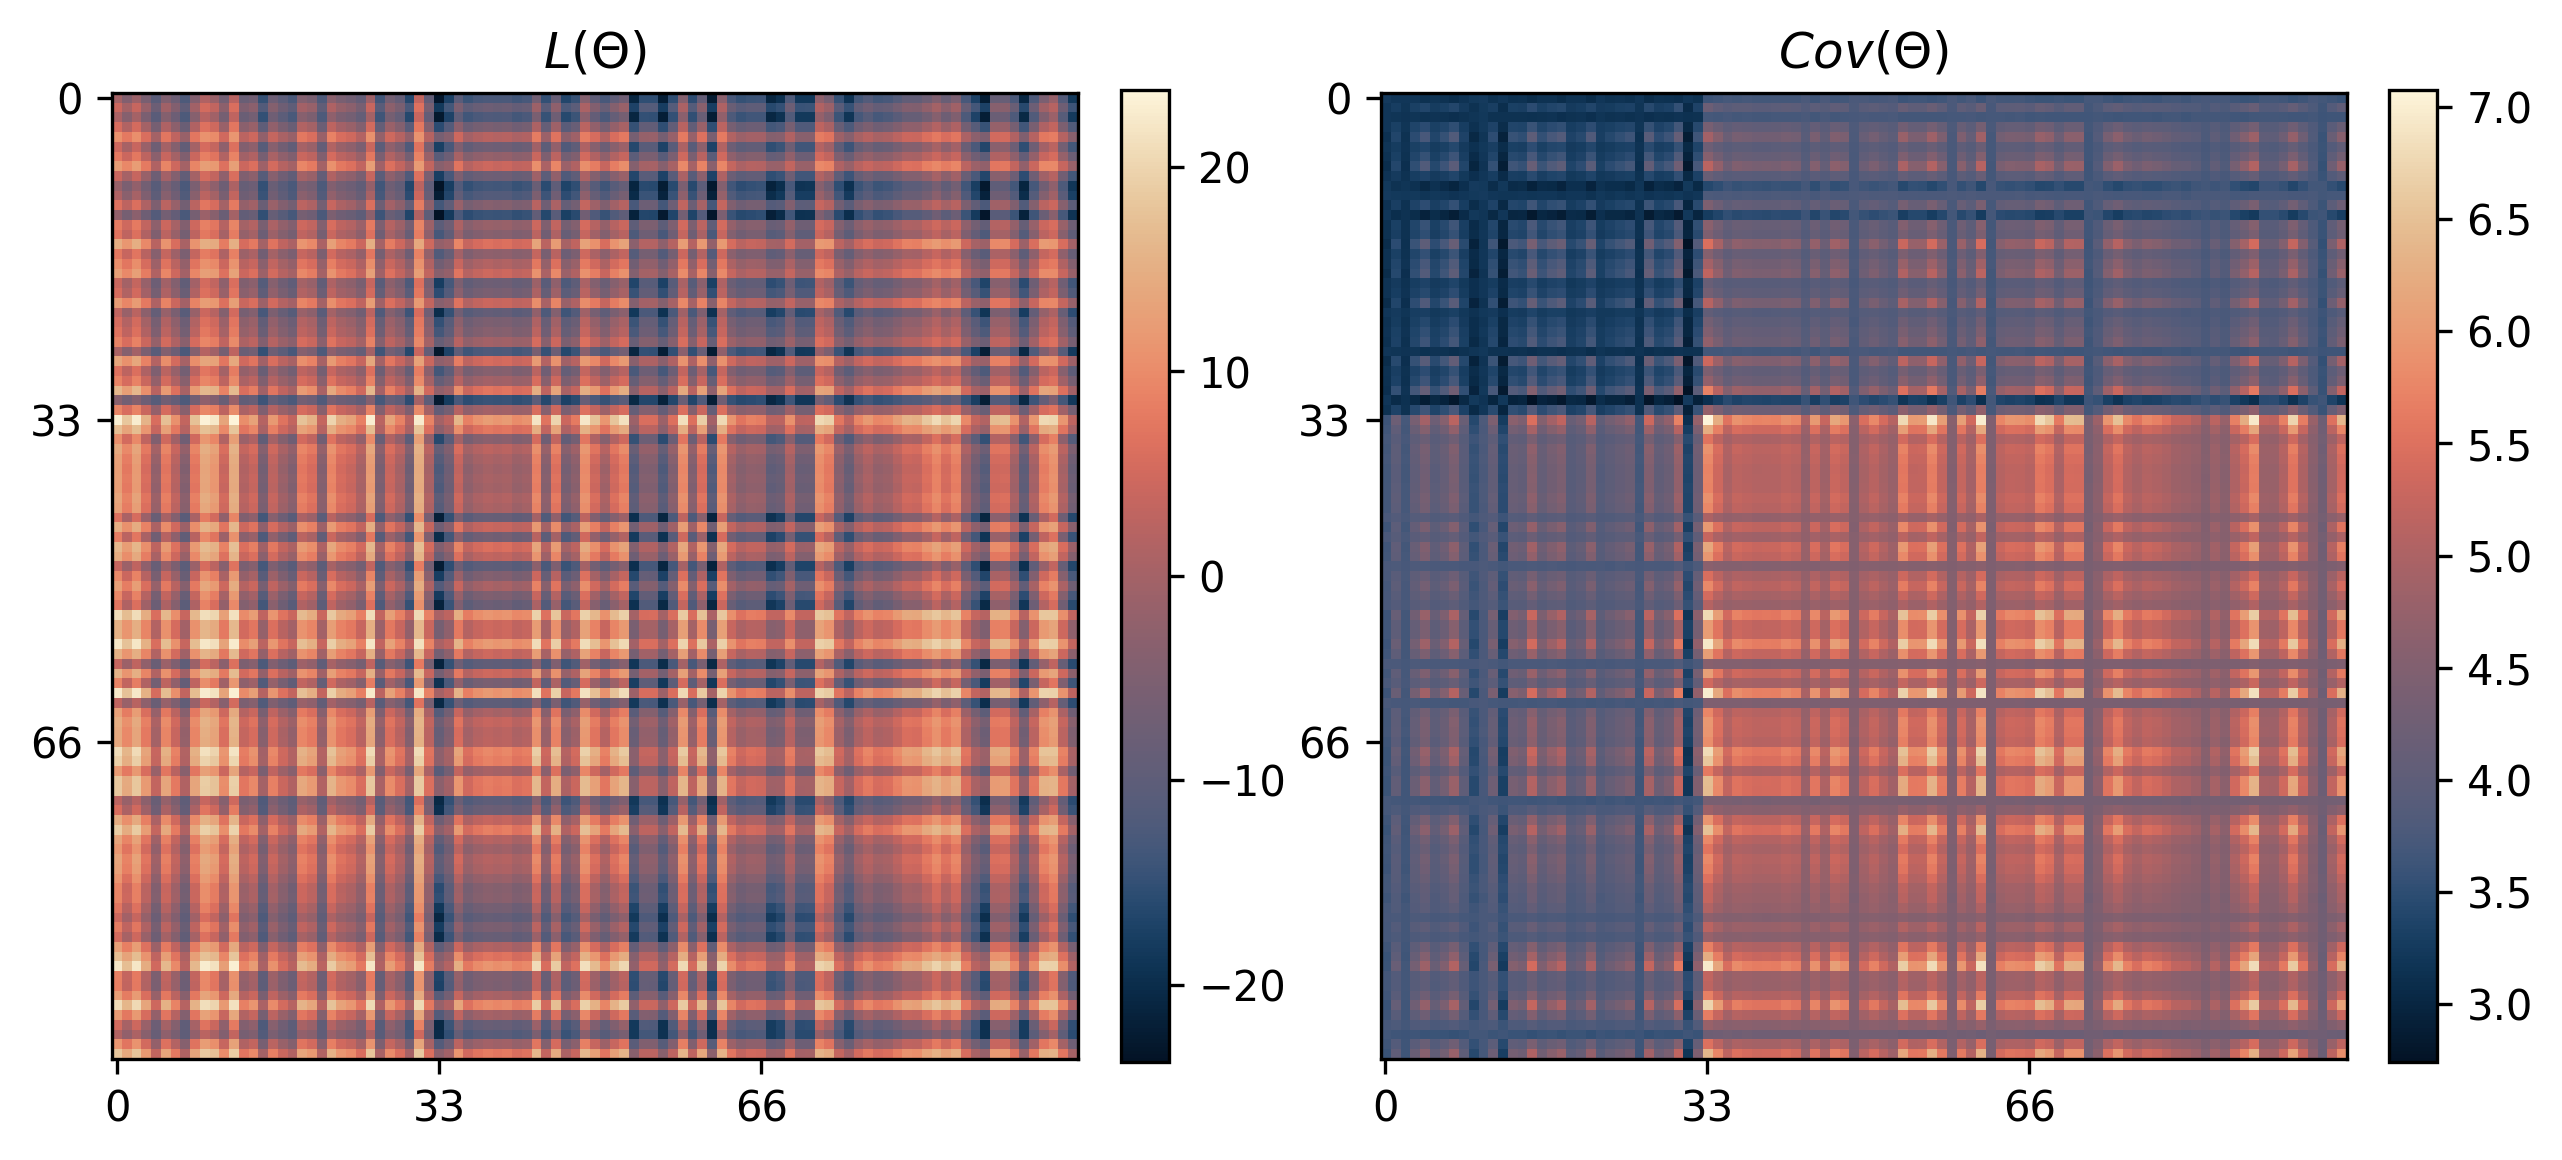

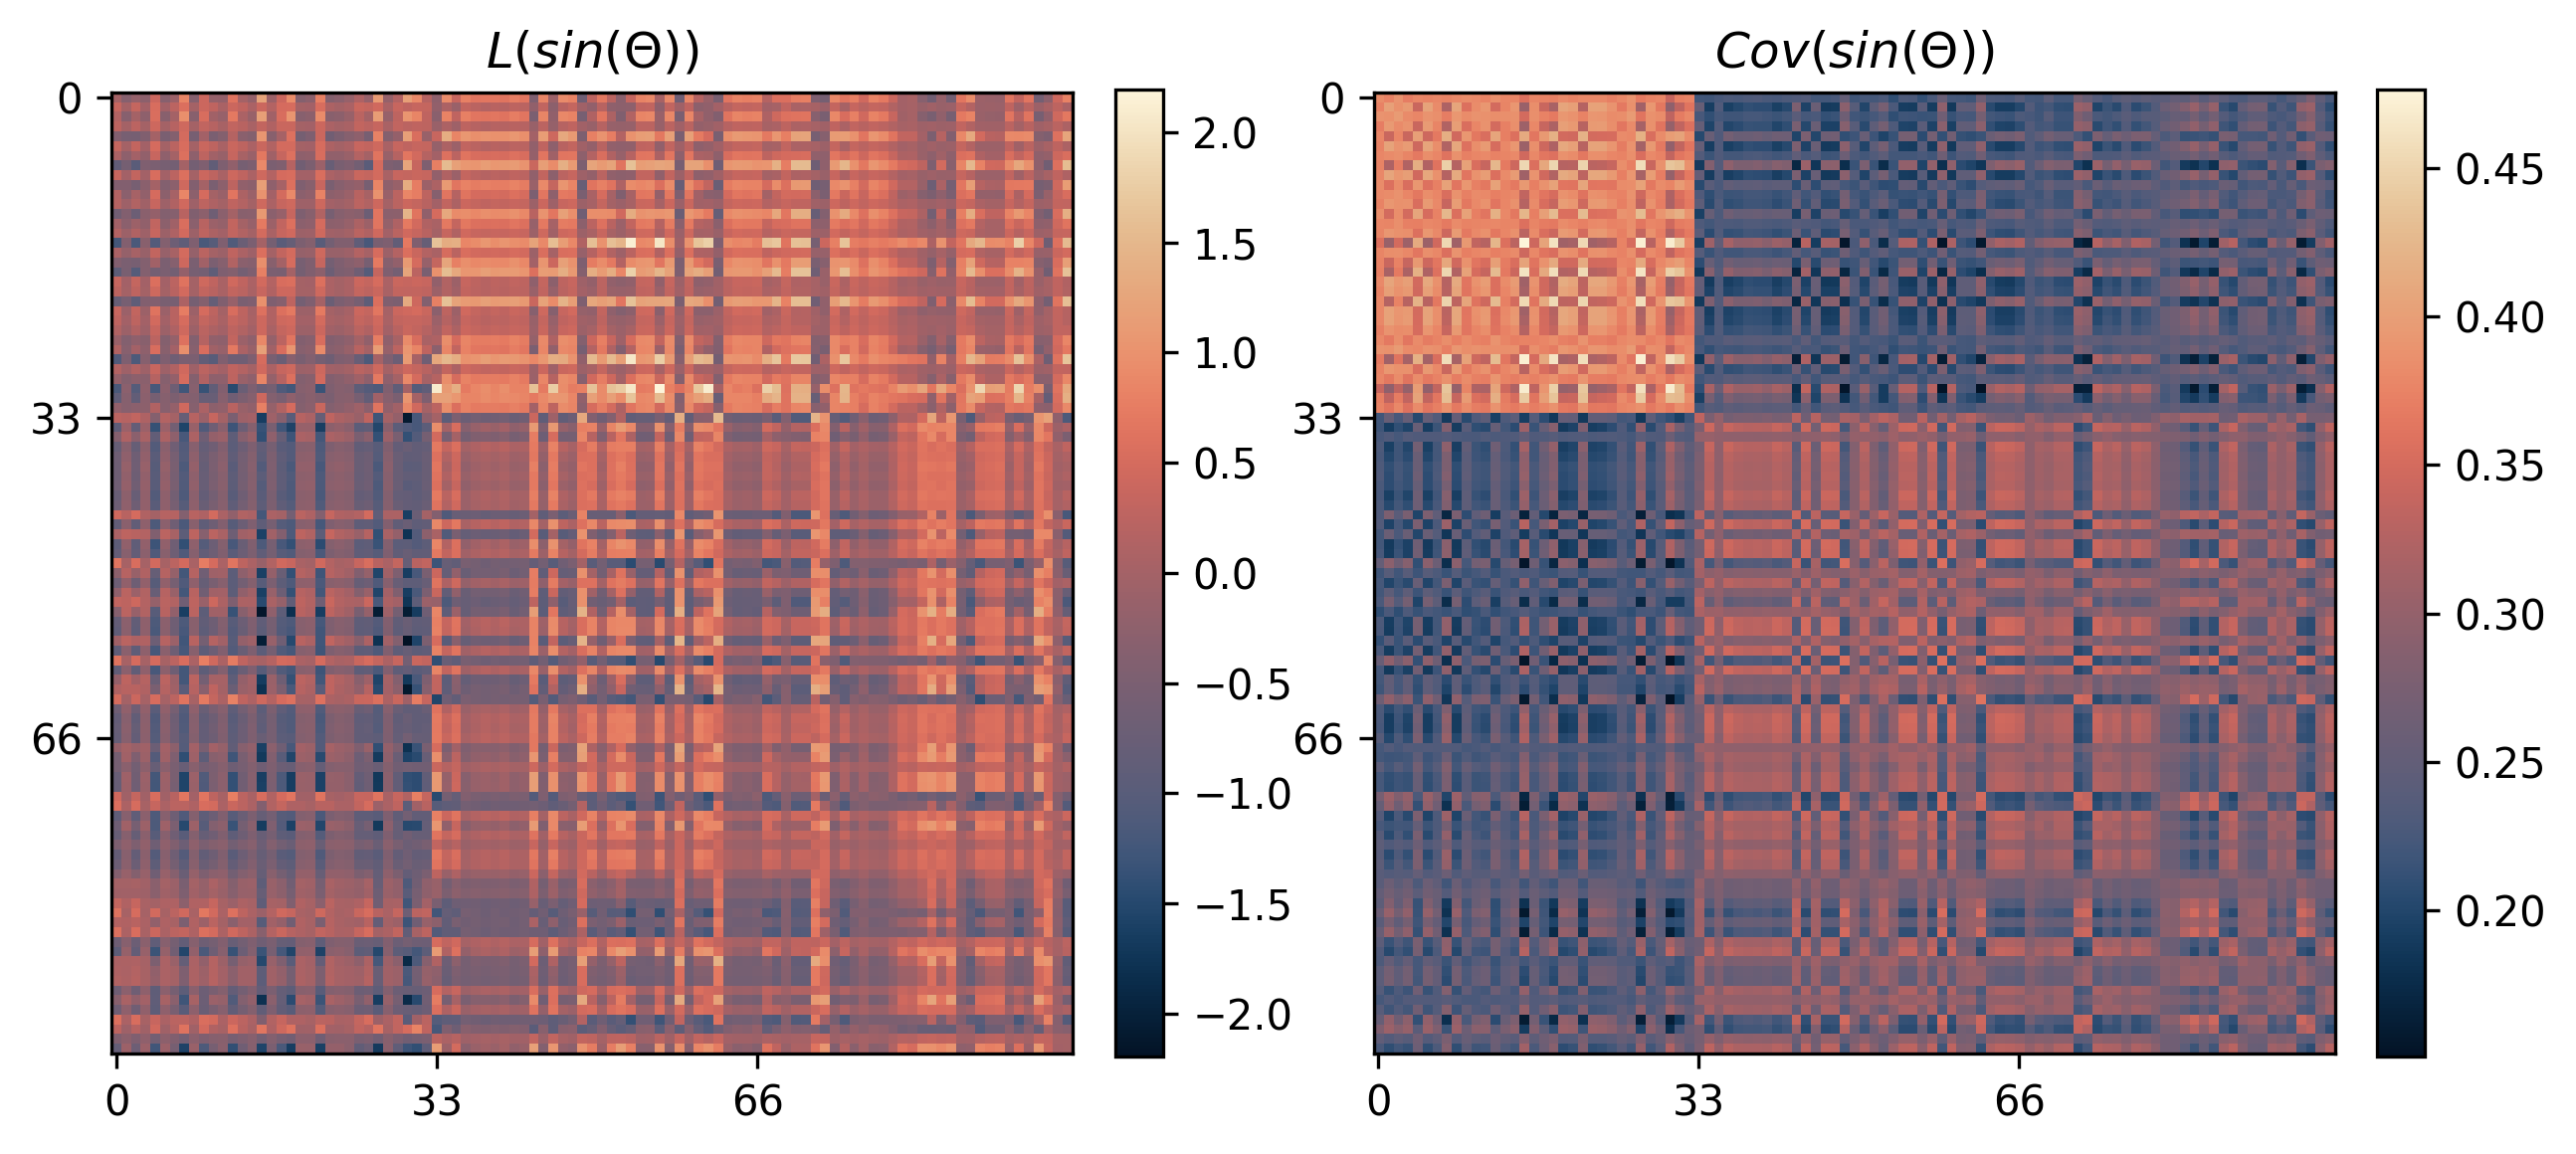

In [5]:
path = sol.y[:, :]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

Ms = [L, C]
label = [r'$L(\Theta)$', r'$Cov(\Theta)$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
Ms = [L_sin, C_sin]
label = [r'$L(sin(\Theta))$', r'$Cov(sin(\Theta))$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

### Clusterization Regime

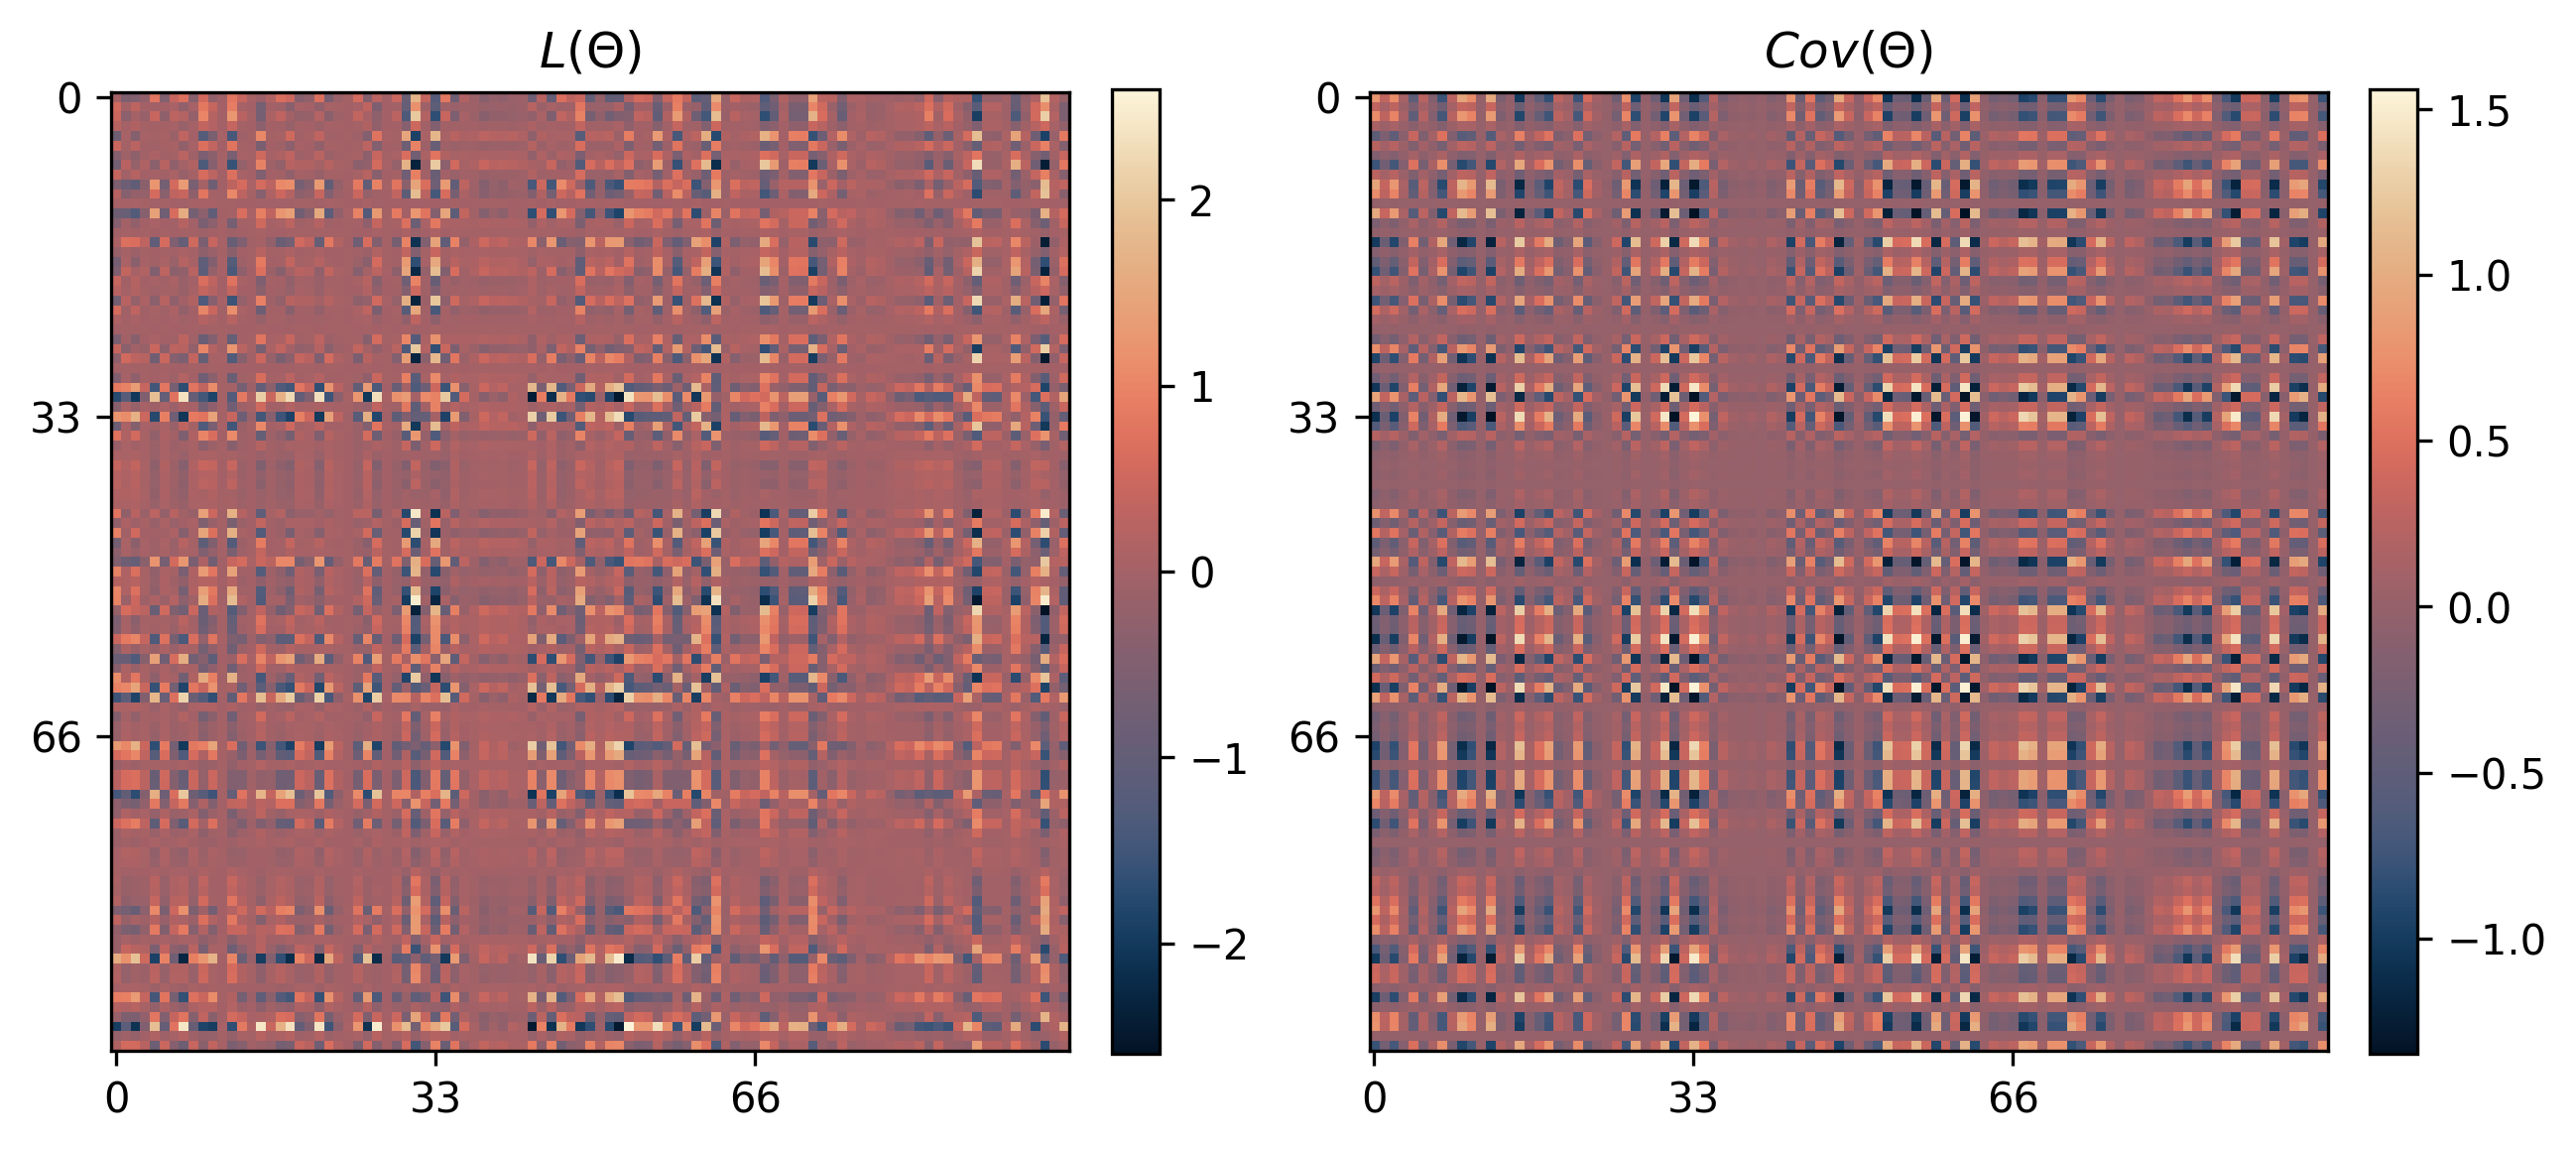

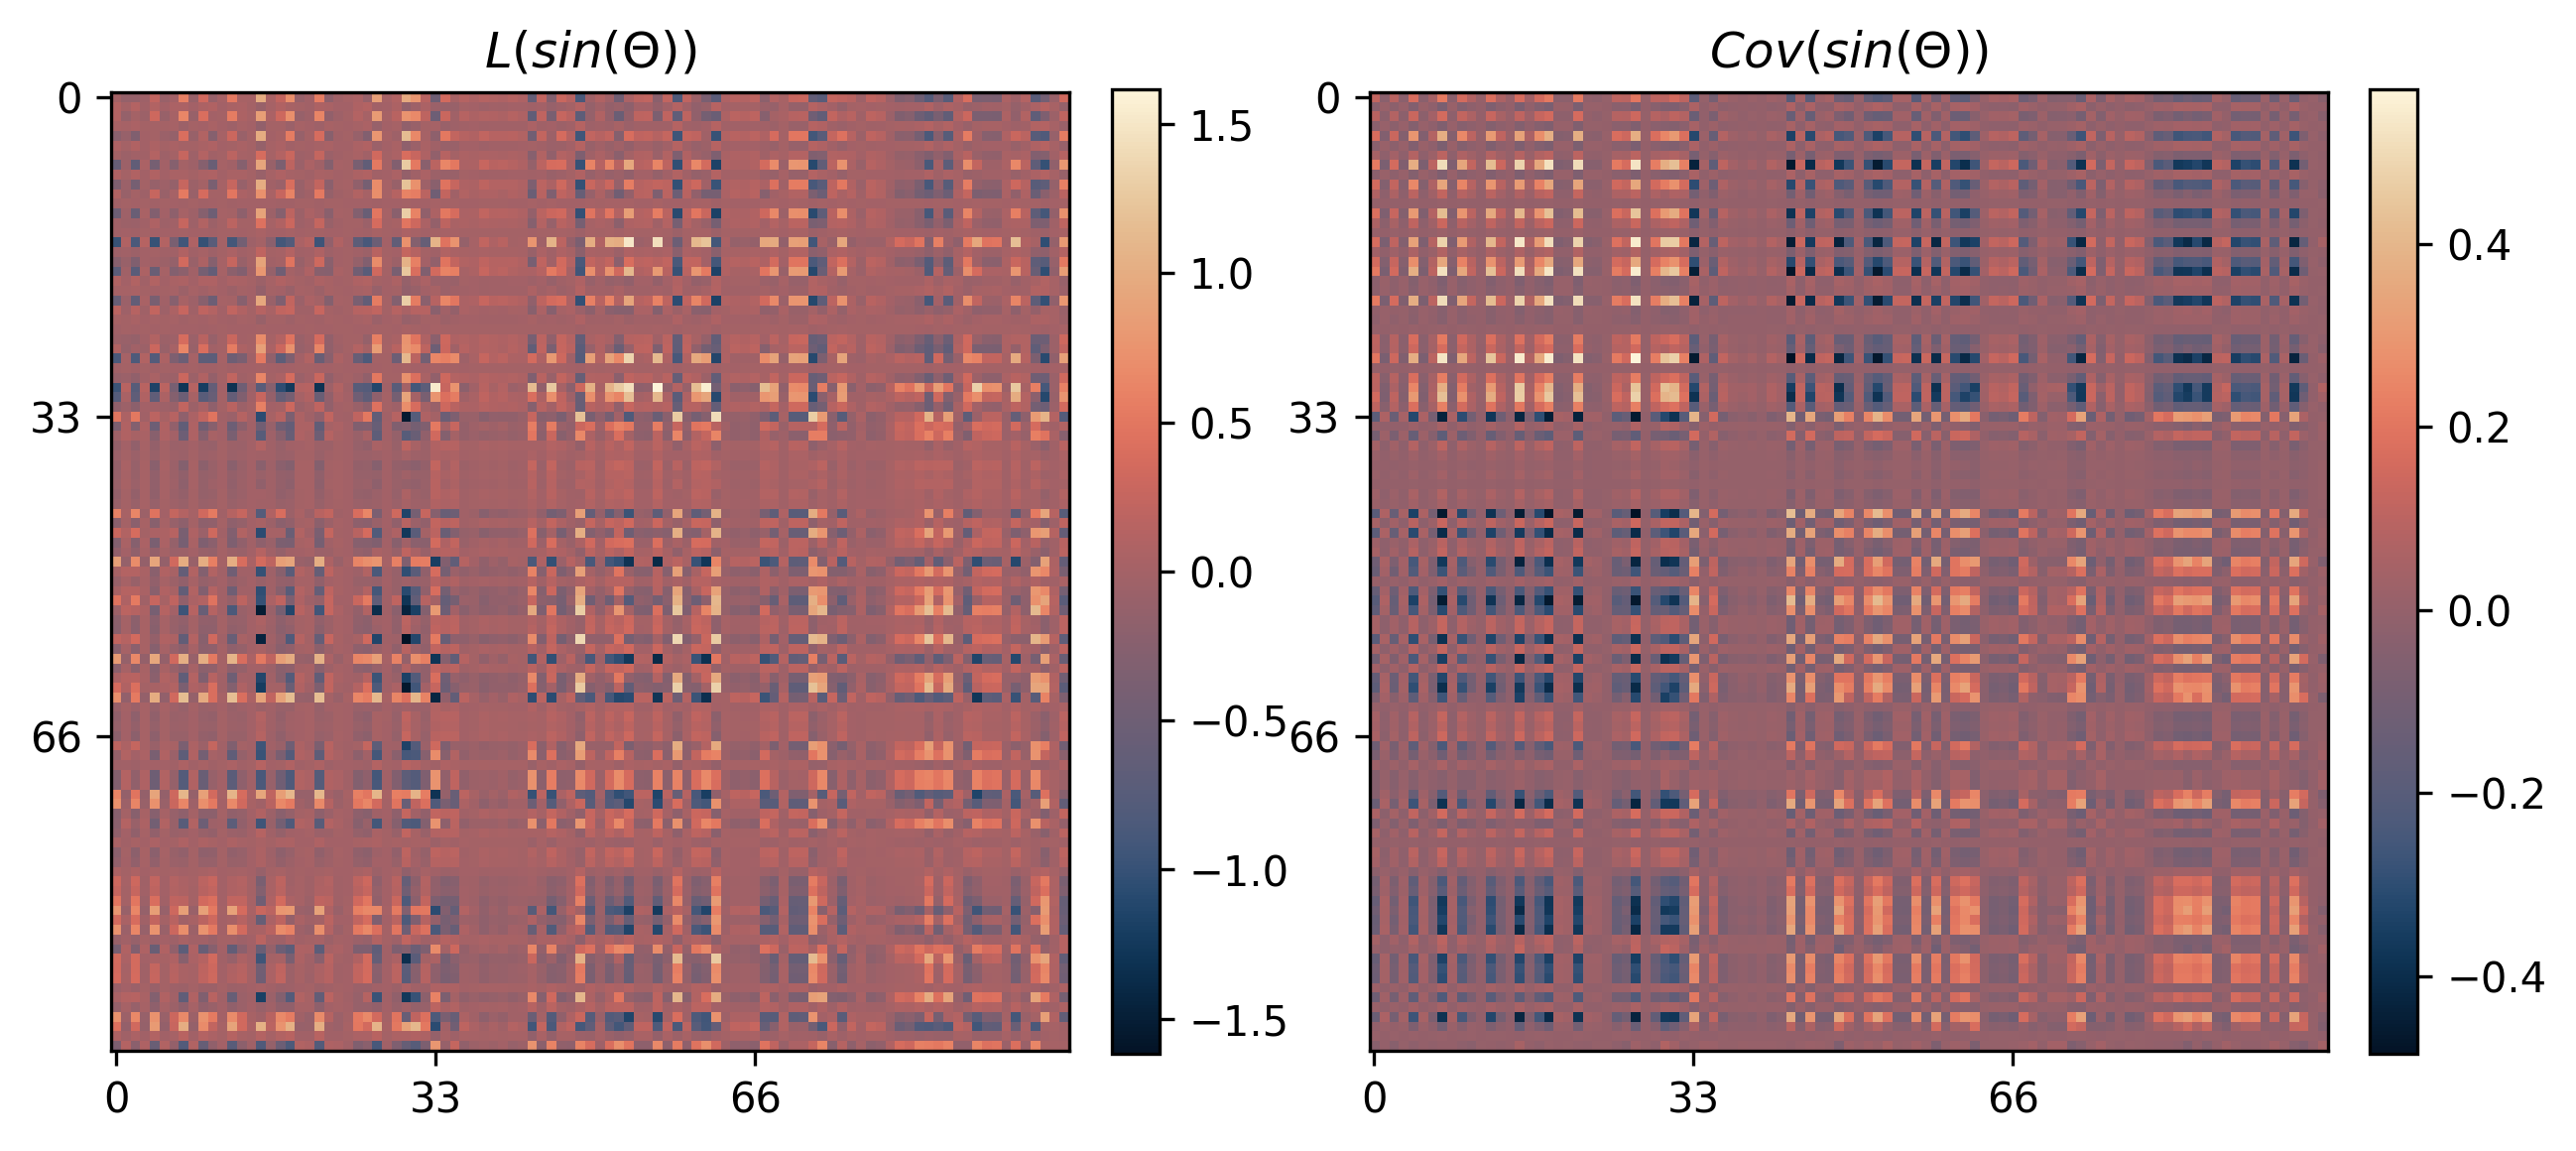

In [6]:
i_start = int(250*0.3/1)
path = sol.y[:, :i_start]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

Ms = [L, C]
label = [r'$L(\Theta)$', r'$Cov(\Theta)$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
Ms = [L_sin, C_sin]
label = [r'$L(sin(\Theta))$', r'$Cov(sin(\Theta))$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

### Transient Regime

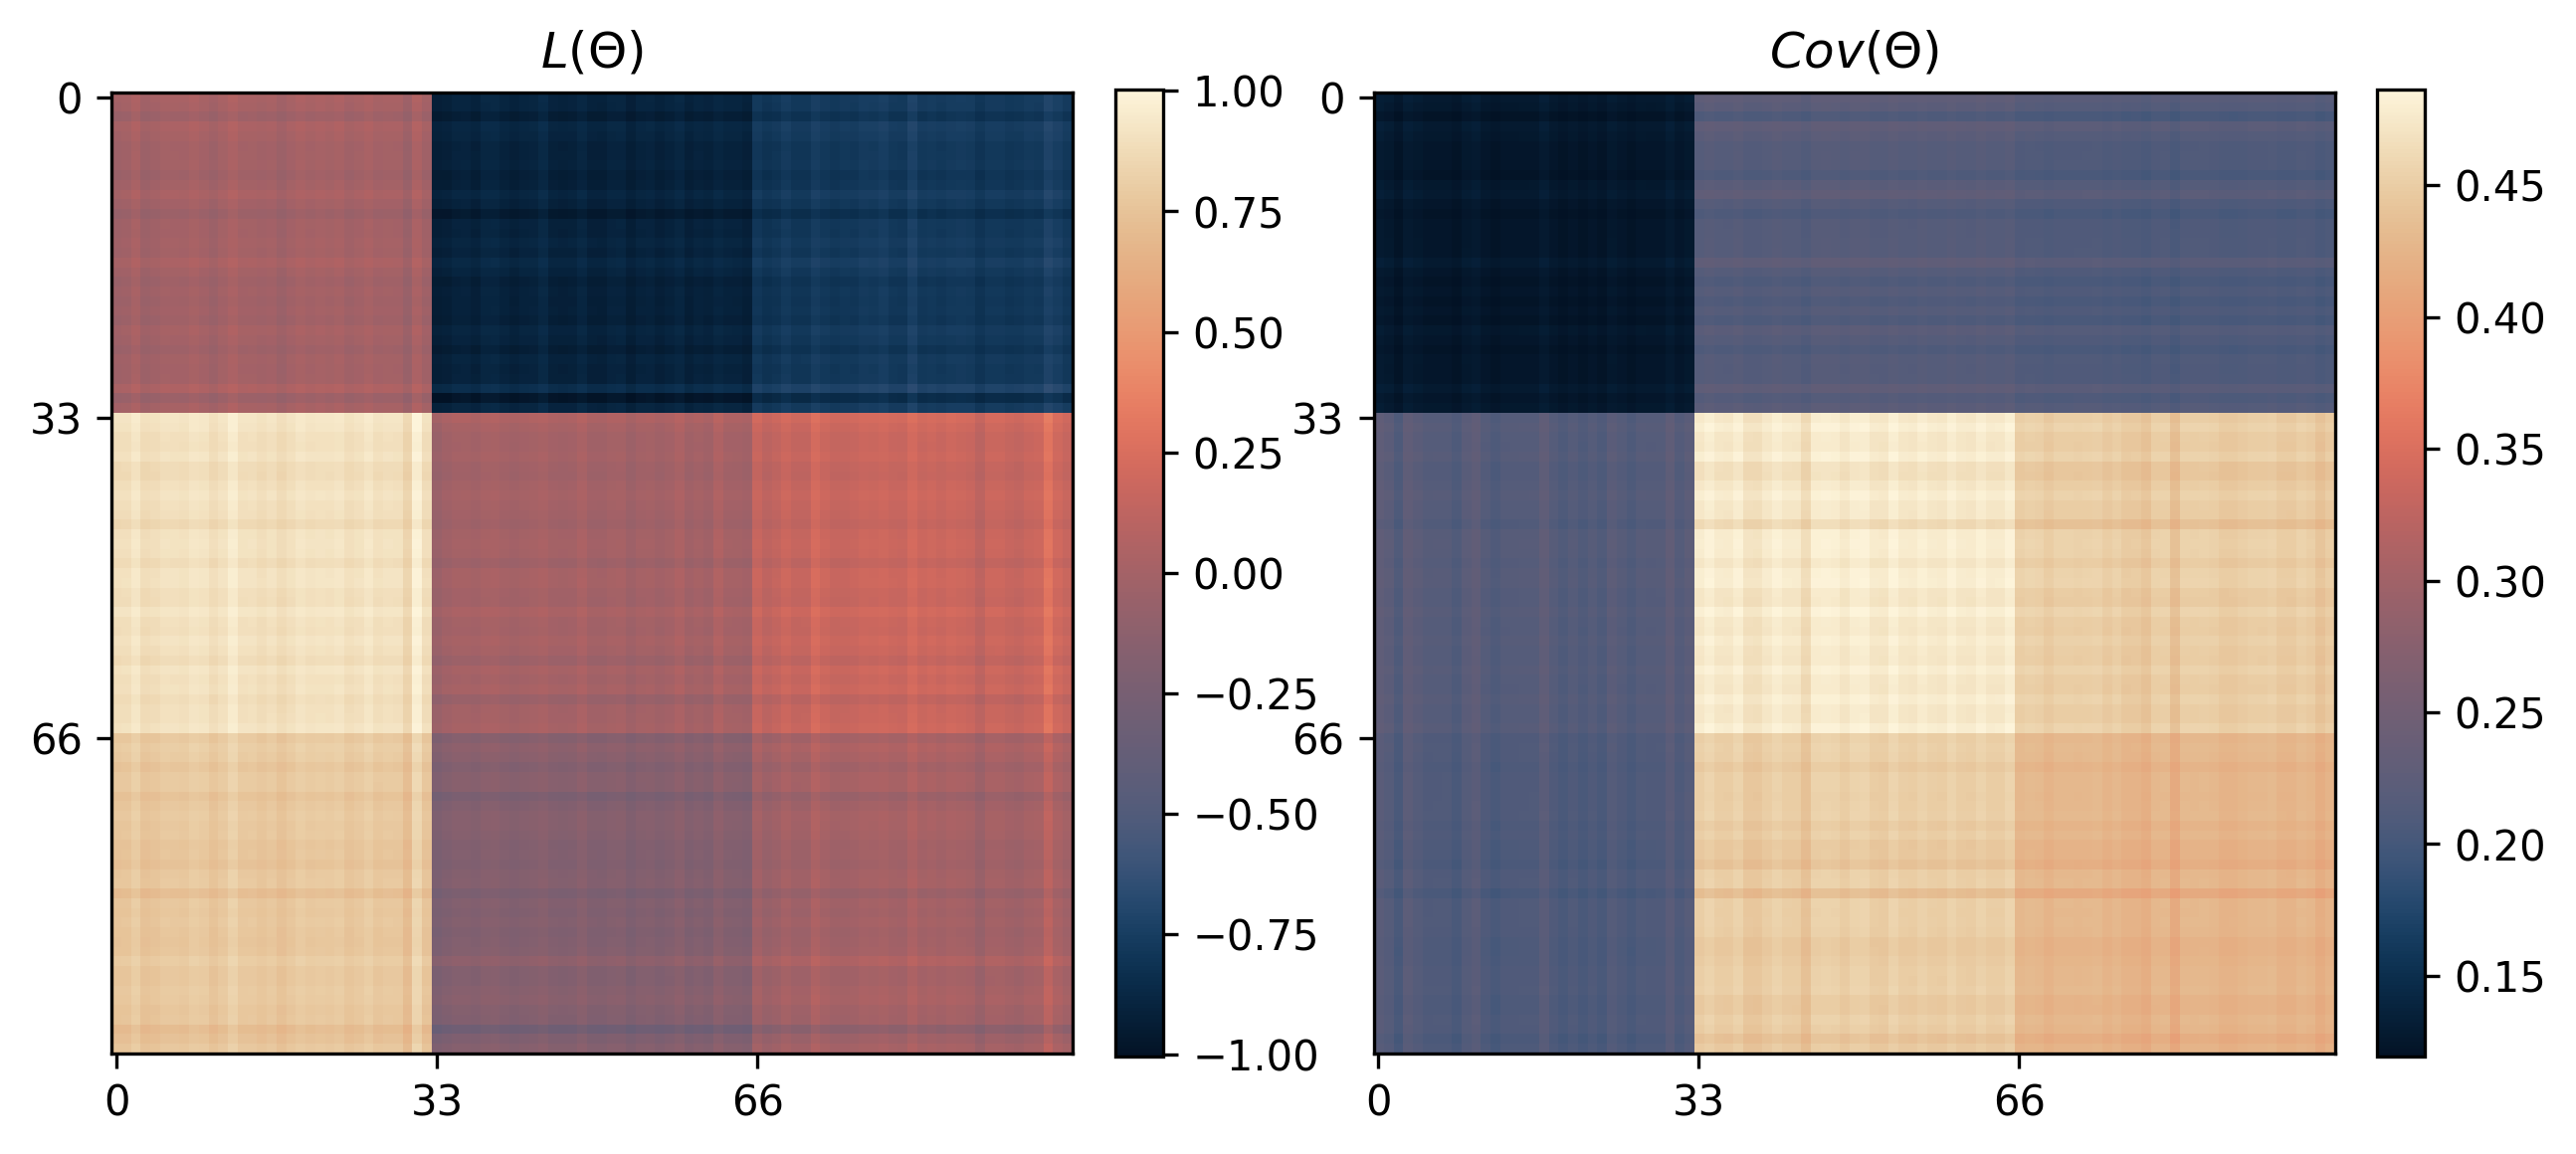

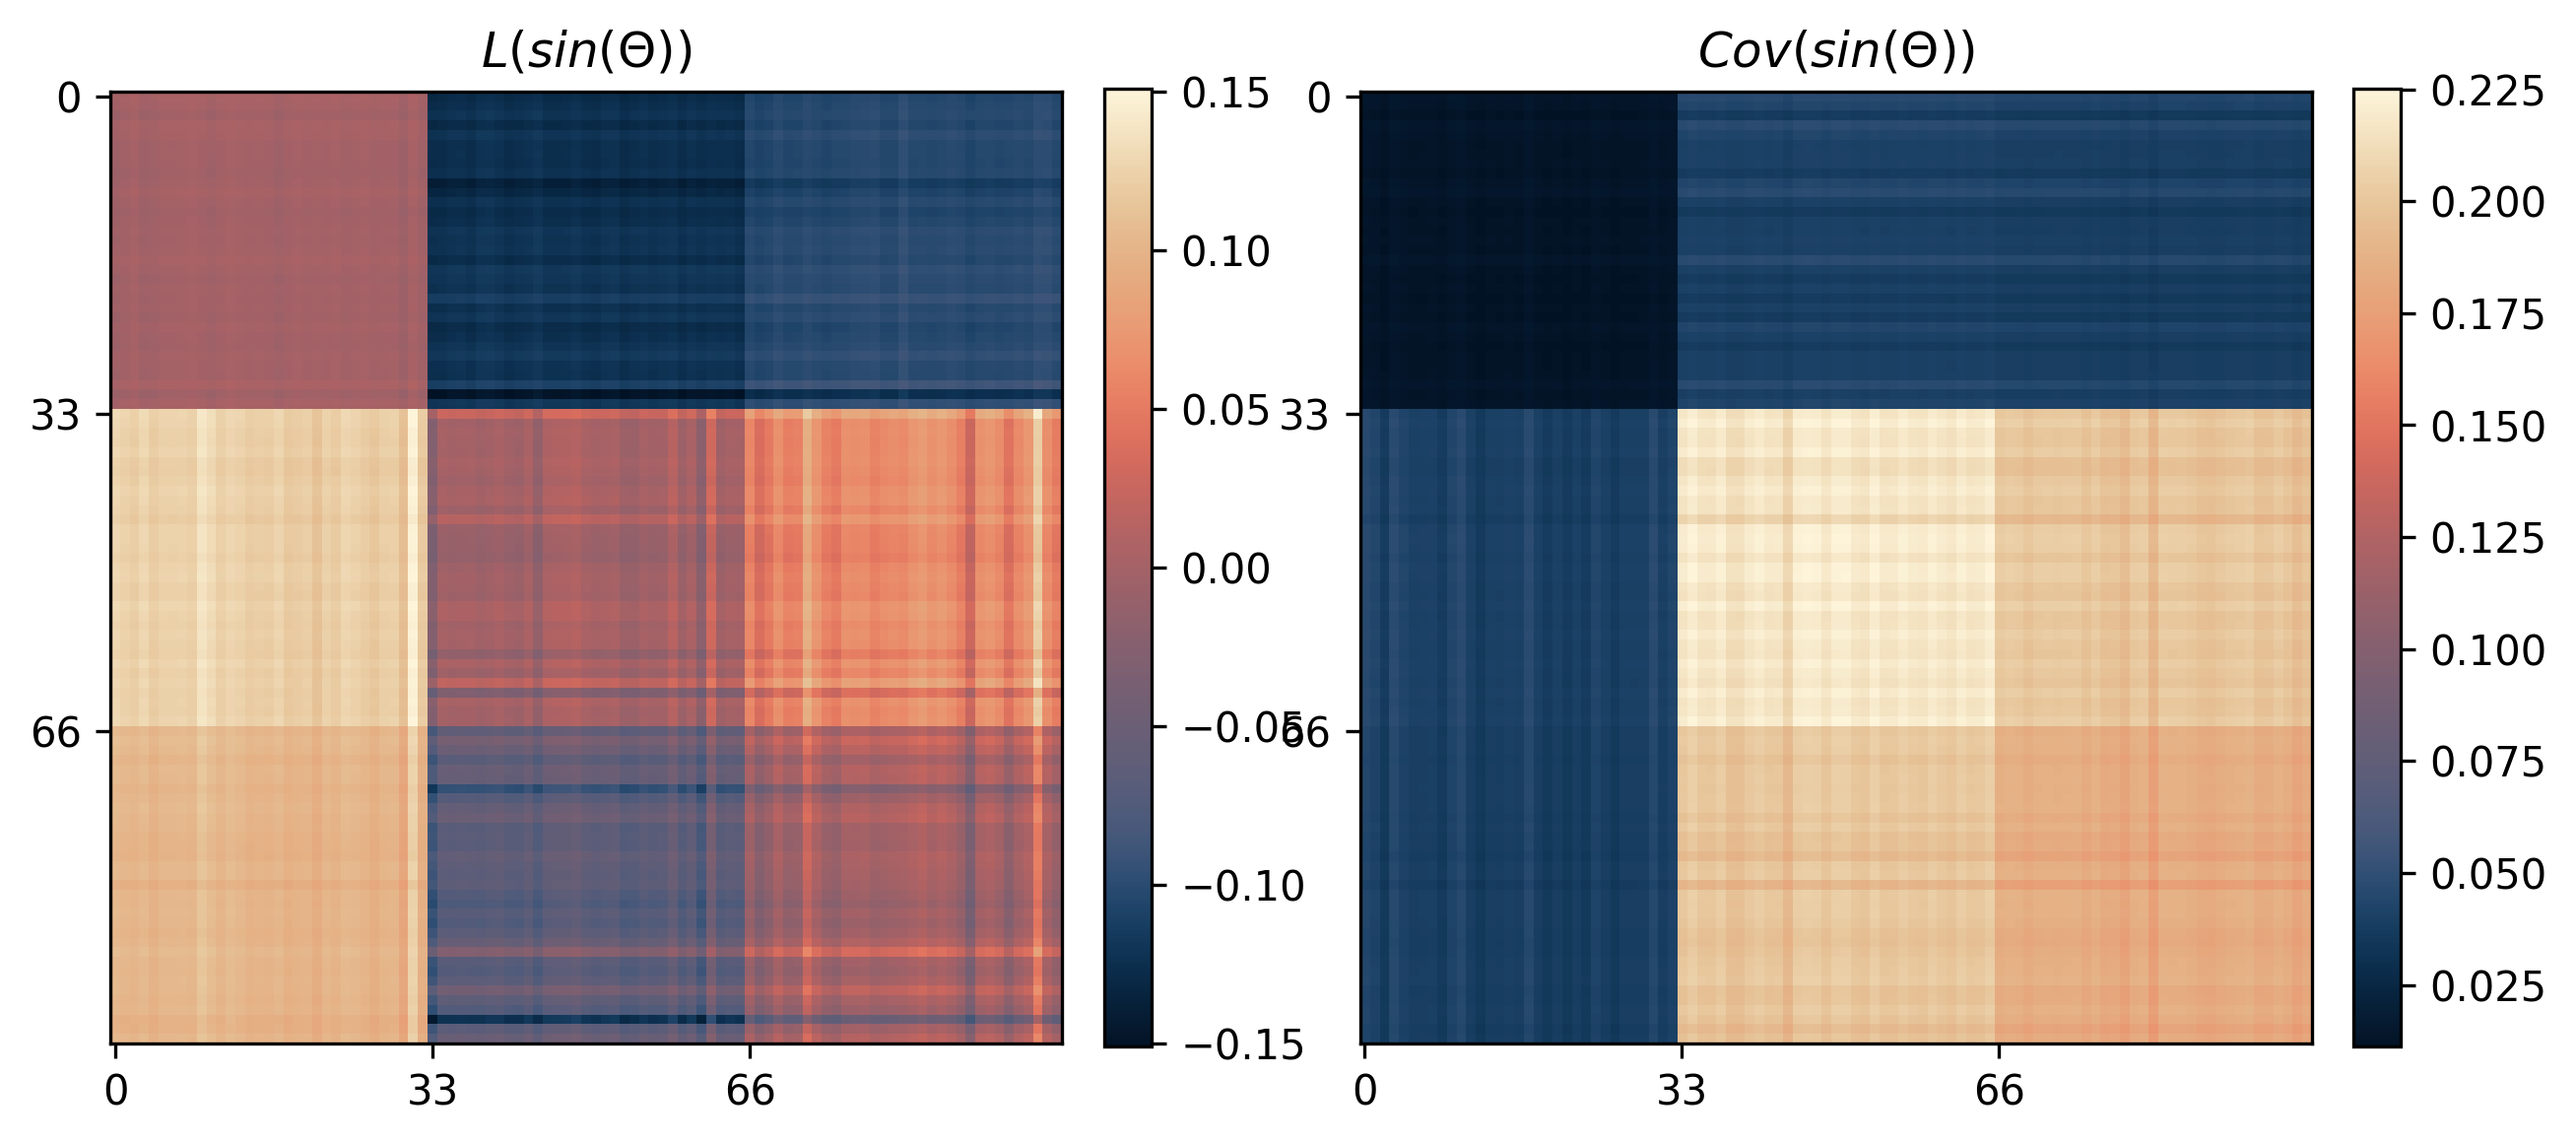

In [7]:
i_start = int(250*0.3/1)
i_end = 249 + int(250*2.5/9)
path = sol.y[:, i_start:i_end]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

Ms = [L, C]
label = [r'$L(\Theta)$', r'$Cov(\Theta)$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
Ms = [L_sin, C_sin]
label = [r'$L(sin(\Theta))$', r'$Cov(sin(\Theta))$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

### Steady-State Regime

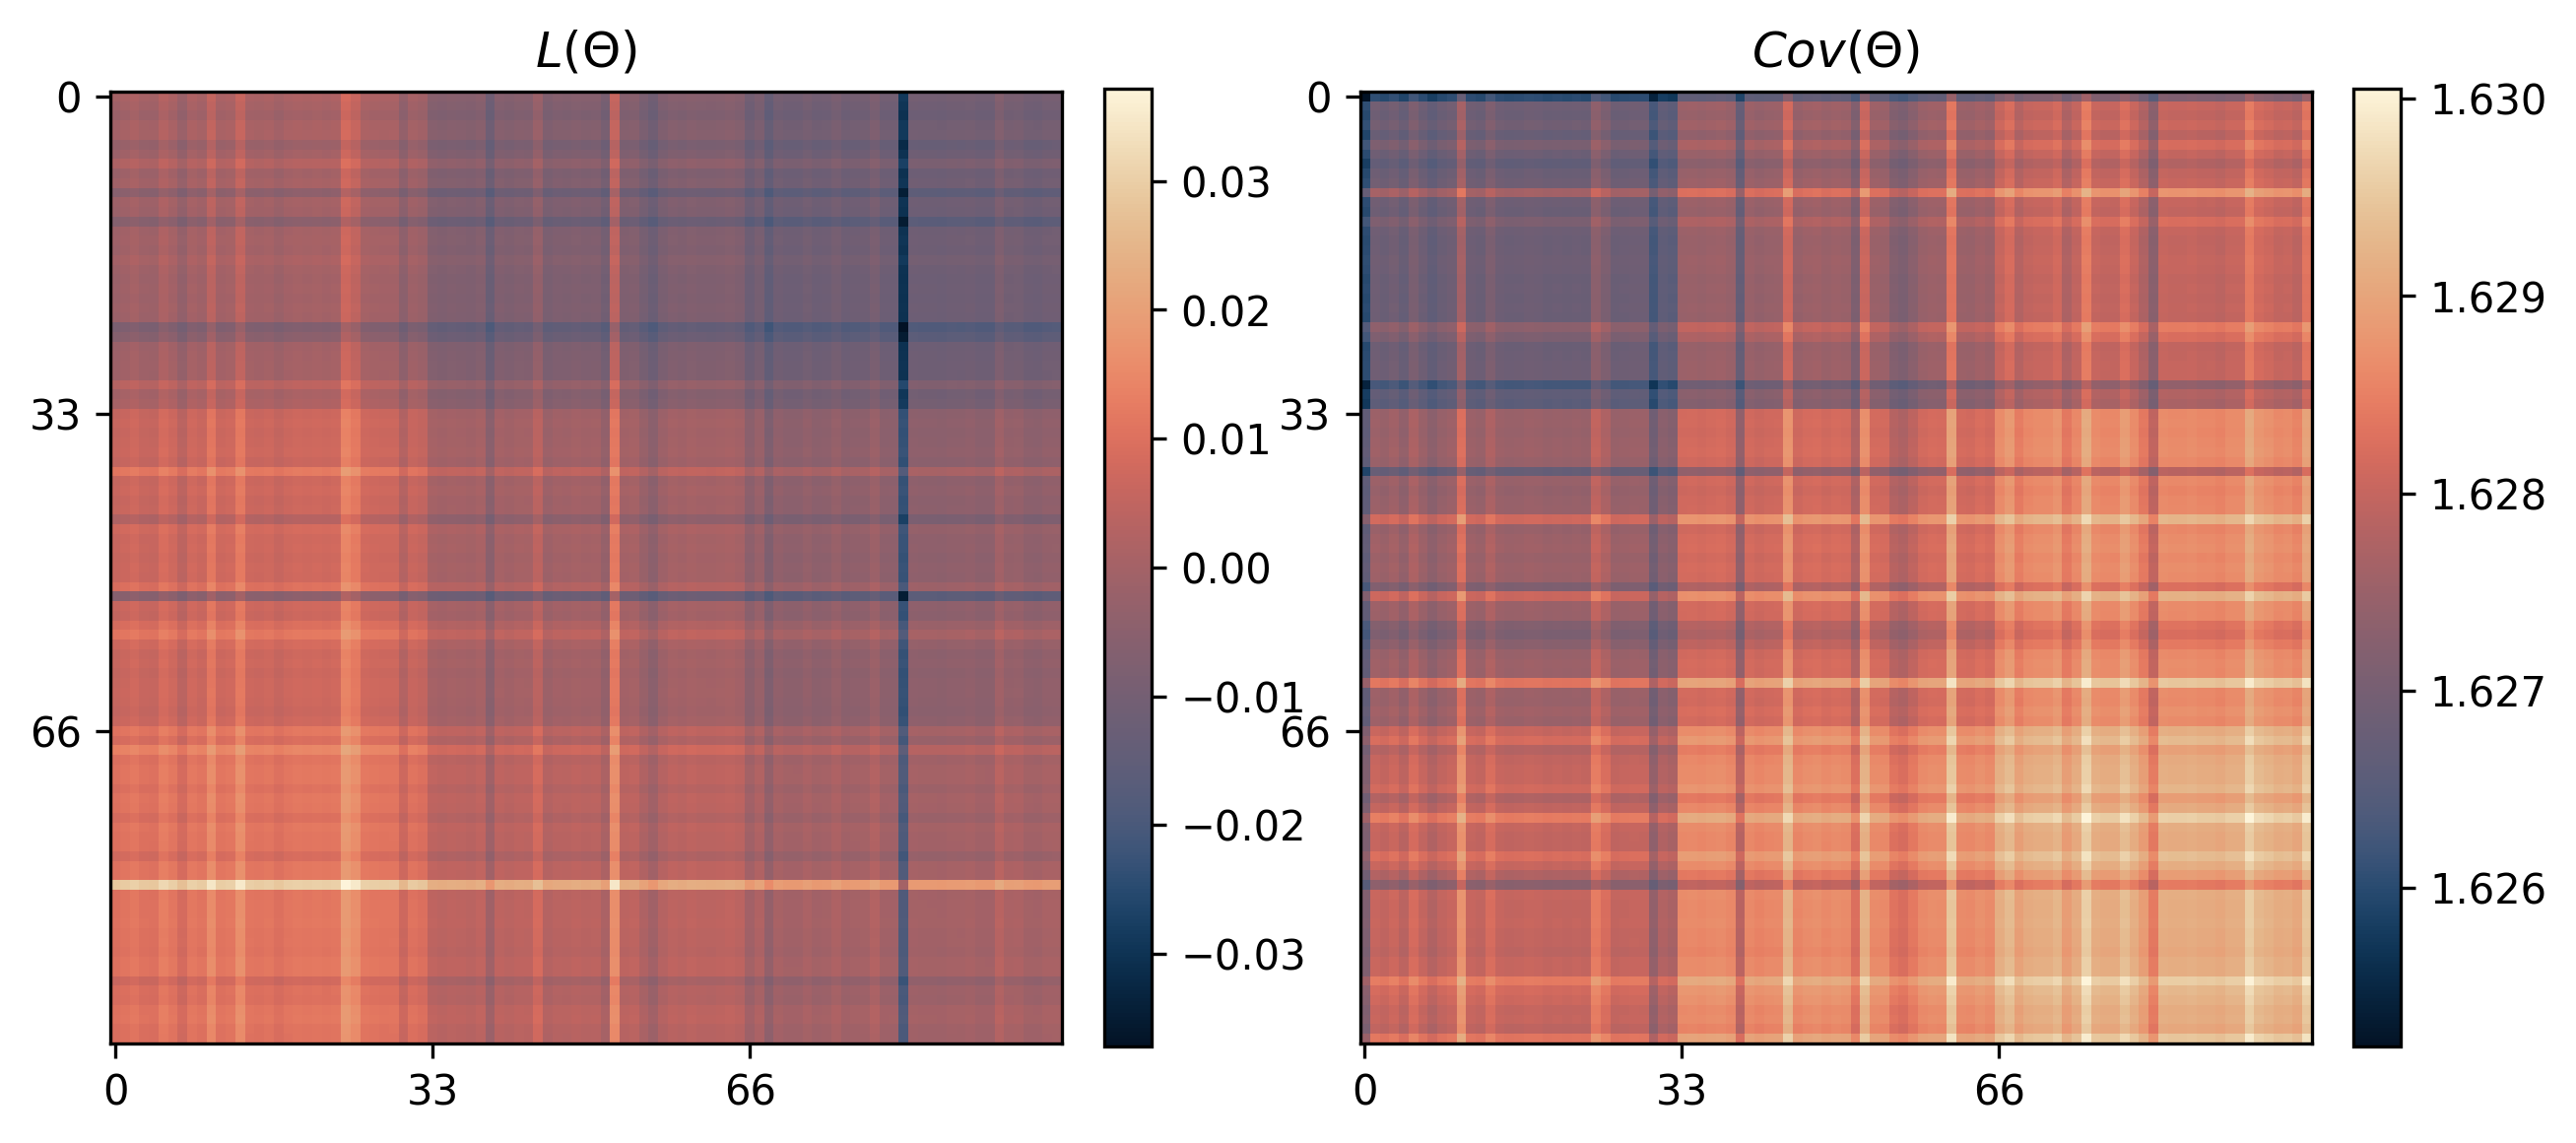

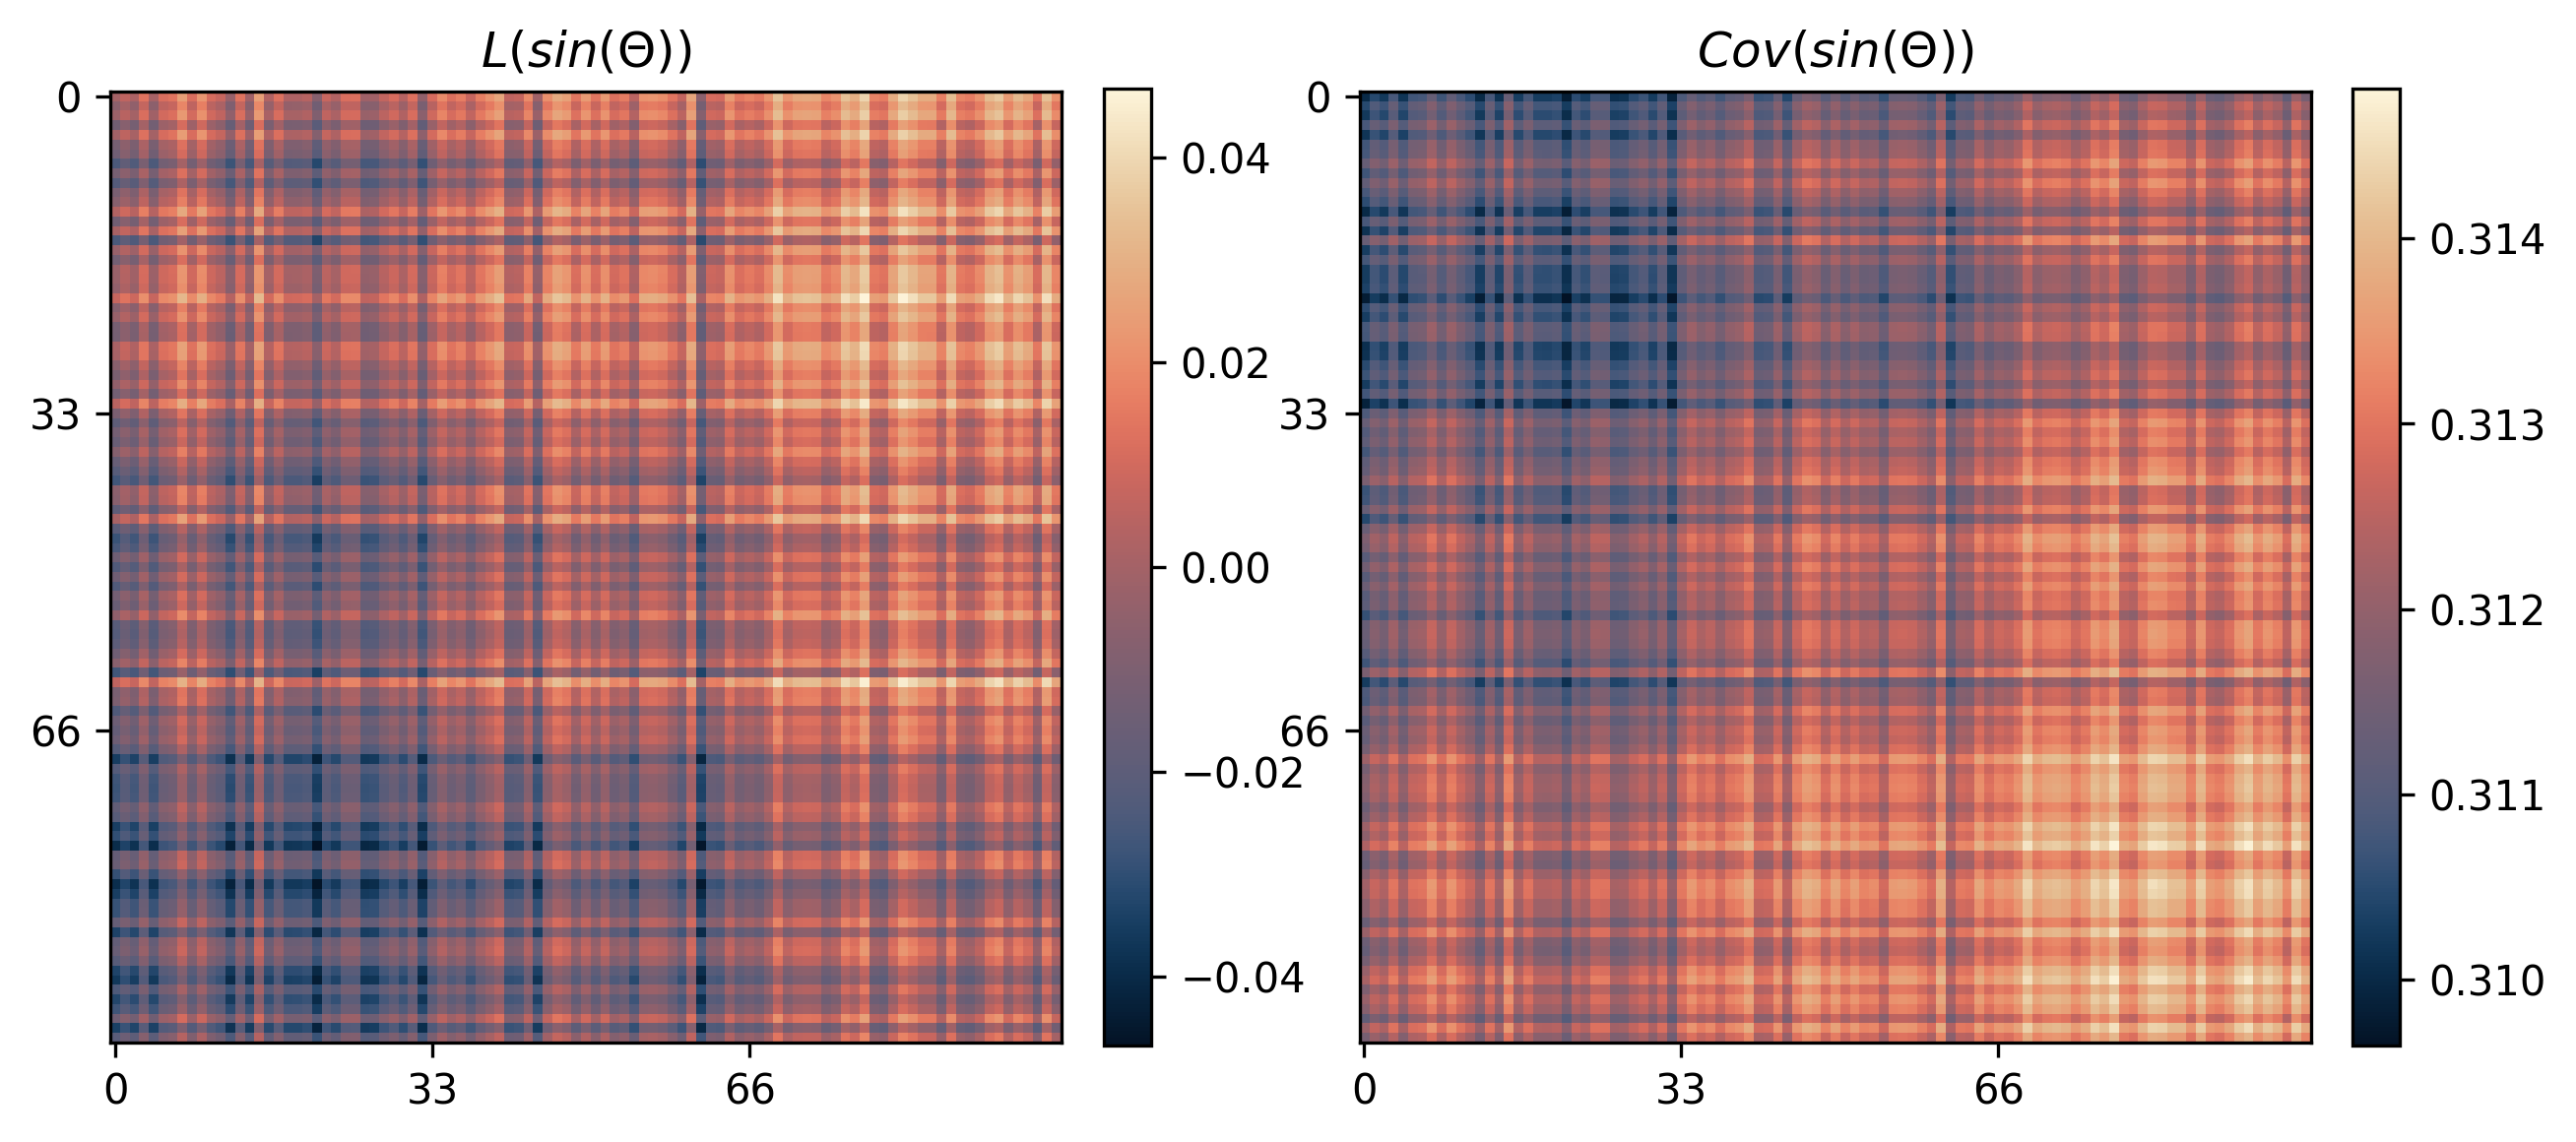

In [8]:
i_end = 249 + int(250*2.5/9)
path = sol.y[:, i_end:]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

Ms = [L, C]
label = [r'$L(\Theta)$', r'$Cov(\Theta)$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
Ms = [L_sin, C_sin]
label = [r'$L(sin(\Theta))$', r'$Cov(sin(\Theta))$']

m = len(Ms)
fig, axes = plt.subplots(1, m, figsize=(10, 5), dpi=300)

for M, ax, l in zip(Ms, axes, label):
    im = ax.imshow(M, cmap=display.get_lipari_map())
    ax.set_title(l)
    ax.set_xticks(np.arange(0, N, step=N_c))
    ax.set_yticks(np.arange(0, N, step=N_c))
    ax.figure.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

# Community Estimation from Regime-Split Time Series

In [9]:
def h(M, N, N_c, n):
    var = 0
    for i in range(n):
        for j in range(n):
            var += np.var(M[i*N_c:(i+1)*N_c, j*N_c:(j+1)*N_c].flatten())
    var = var/((n**2))
    return var

def d(M, N, N_c, n):
    avg_M = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            avg_M[i,j] = np.mean(M[i*N_c:(i+1)*N_c, j*N_c:(j+1)*N_c].flatten())
    
    discr = 0
    for i in range(n):
        for j in range(n):
            discr += (avg_M[i,j] - avg_M[i,i])**2 + (avg_M[i,j] - avg_M[j,j])**2         
    discr = discr/((n**2))
    return discr

def g(M, N, n):
    return d(M, N, N//n, n)/h(M, N, N//n, n)

In [10]:
def h_x(M, x):
    var = 0
    n_comm = np.max(x)+1
    
    for r in range(n_comm):
        for s in range(n_comm):
            var += np.var(M[x==r][:,x==s].flatten())
        
    var = var/((n_comm**2))
    return var

def d_x(M, x):
    n_comm = np.max(x)+1
    avg_M = np.zeros((n_comm,n_comm))
    
    for r in range(n_comm):
        for s in range(n_comm):
            avg_M[r,s] = np.mean(M[x==r][:,x==s].flatten())
    
    discr = 0
    for r in range(n_comm):
        for s in range(n_comm):
            discr += (avg_M[r,s] - avg_M[r,r])**2 + (avg_M[r,s] - avg_M[s,s])**2         
    discr = discr/((n_comm**2))
    return discr

def g_x(M, x):
    return d_x(M, x)/(h_x(M, x)*(np.max(x)+1))

def identify(M):
    N_node = M.shape[0]

    # initialize
    community_assignment = np.zeros(N_node, dtype=int)
    means_idx = []
    
    old_comm = np.copy(community_assignment)
    old_g = g_x(M, community_assignment)

    D = np.zeros((N_node, N_node))
    for i in range(N_node):
        for j in range(i):
            D[i,j] = np.linalg.norm(M[i]-M[j])
    D = D + D.T
    
    target_idx = np.unravel_index(np.argmax(D, axis=None), D.shape)
    
    means_idx += [target_idx[0]]
    means_idx += [target_idx[1]]
    
    mean_A = target_idx[0]
    mean_B = target_idx[1]
    
    for i in range(N_node):
        community_assignment[i] = np.argmin(D[i, means_idx].flatten())
    
    current_g = g_x(M, community_assignment)
    if (current_g < old_g):
        return old_comm
    old_comm = np.copy(community_assignment)
    old_g = current_g
    
    for iter in range(20):
        target_max = 0
        target_idx = (0,0)
        target_comm = 0
        ref_idx = np.arange(N_node)
        for r in range(len(means_idx)):
            D_rr = D[community_assignment==r][:,community_assignment==r]
            current_max = np.max(D_rr, axis=None)
            if current_max > target_max:
                target_max = current_max
                local_idx = np.unravel_index(np.argmax(D_rr, axis=None), D_rr.shape)
                target_idx = ref_idx[community_assignment==r][np.array(local_idx)]
                target_comm = r

        means_idx[target_comm] = target_idx[0]
        means_idx += [target_idx[1]]

        for i in range(N_node):
            community_assignment[i] = np.argmin(D[i, means_idx].flatten())

        current_g = g_x(M, community_assignment)
        if (current_g < old_g):
            return old_comm
        old_comm = np.copy(community_assignment)
        old_g = current_g
        
    return community_assignment

def agreement(x):
    N_node = len(x)
    N_node_per_comm = N_node // 3 
    p1 = [0, 1, 2]
    p2 = [1, 0, 2]
    p3 = [1, 2, 0]
    p4 = [0, 2, 1]
    p5 = [2, 0, 1]
    p6 = [2, 1, 0]
    ps = [p1, p2, p3, p4, p5, p6]
    
    agr = 0
    for p in ps:
        truth = np.repeat(p, N_node_per_comm)
        current_agr = (np.sum(np.where(truth == x, 1, 0))*1.)/N_node
        if current_agr > agr:
            agr = current_agr
            
    return agr

In [11]:
path = sol.y[:, :]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

print('\nFULL')
print(f'L:{g(L,N,n)} (agr:{agreement(identify(L))})')
print(f'C:{g(C,N,n)} (agr:{agreement(identify(C))})')
print(f'L_sin:{g(L_sin,N,n)} (agr:{agreement(identify(L_sin))})')
print(f'C_sin:{g(C_sin,N,n)} (agr:{agreement(identify(C_sin))})')

i_start = int(250*0.3/1)
i_end = 249 + int(250*2.5/9)

path = sol.y[:, :i_start]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

print('\nCLUSTERIZATION')
print(f'L:{g(L,N,n)} (agr:{agreement(identify(L))})')
print(f'C:{g(C,N,n)} (agr:{agreement(identify(C))})')
print(f'L_sin:{g(L_sin,N,n)} (agr:{agreement(identify(L_sin))})')
print(f'C_sin:{g(C_sin,N,n)} (agr:{agreement(identify(C_sin))})')

path = sol.y[:, i_start:i_end]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

print('\nTRANSIENT')
print(f'L:{g(L,N,n)} (agr:{agreement(identify(L))})')
print(f'C:{g(C,N,n)} (agr:{agreement(identify(C))})')
print(f'L_sin:{g(L_sin,N,n)} (agr:{agreement(identify(L_sin))})')
print(f'C_sin:{g(C_sin,N,n)} (agr:{agreement(identify(C_sin))})')

path = sol.y[:, i_end:]
sin_path = np.sin(path)

L = lead_matrix(path)
C = np.cov(path)
L_sin = lead_matrix(sin_path)
C_sin = np.cov(sin_path)

print('\nSS')
print(f'L:{g(L,N,n)} (agr:{agreement(identify(L))})')
print(f'C:{g(C,N,n)} (agr:{agreement(identify(C))})')
print(f'L_sin:{g(L_sin,N,n)} (agr:{agreement(identify(L_sin))})')
print(f'C_sin:{g(C_sin,N,n)} (agr:{agreement(identify(C_sin))})')


FULL
L:0.2759228374229303 (agr:0.1717171717171717)
C:3.6368219922711953 (agr:0.30303030303030304)
L_sin:0.5986768816309416 (agr:0.36363636363636365)
C_sin:7.520710046109324 (agr:0.3838383838383838)

CLUSTERIZATION
L:0.0003577882293402793 (agr:0.36363636363636365)
C:0.0001418206887748349 (agr:0.3939393939393939)
L_sin:0.011681278437145354 (agr:0.25252525252525254)
C_sin:0.5108569966860984 (agr:0.4444444444444444)

TRANSIENT
L:578.8351611720095 (agr:0.9797979797979798)
C:885.248332687945 (agr:0.7676767676767676)
L_sin:84.19639129927681 (agr:0.98989898989899)
C_sin:1009.0371139869458 (agr:1.0)

SS
L:6.063896761609553 (agr:0.6464646464646465)
C:7.432546174708214 (agr:0.29292929292929293)
L_sin:1.943394958762025 (agr:0.10101010101010101)
C_sin:4.072092954116079 (agr:0.23232323232323232)


# Identical-Dominated Gaussian KSBM & Critical Time

In [12]:
def dv_dom_gauss_KSB(t, v):
    return -(np.exp(-v)*kappa*2*v/n) 

C:\Users\arthu\AppData\Local\Temp\ipykernel_15240\3507278604.py:2: RuntimeWarning: overflow encountered in exp
  return -(np.exp(-v)*kappa*2*v/n)
C:\Users\arthu\AppData\Local\Temp\ipykernel_15240\3507278604.py:2: RuntimeWarning: invalid value encountered in multiply
  return -(np.exp(-v)*kappa*2*v/n)


Text(0.5, 1.0, 'Community Variance')

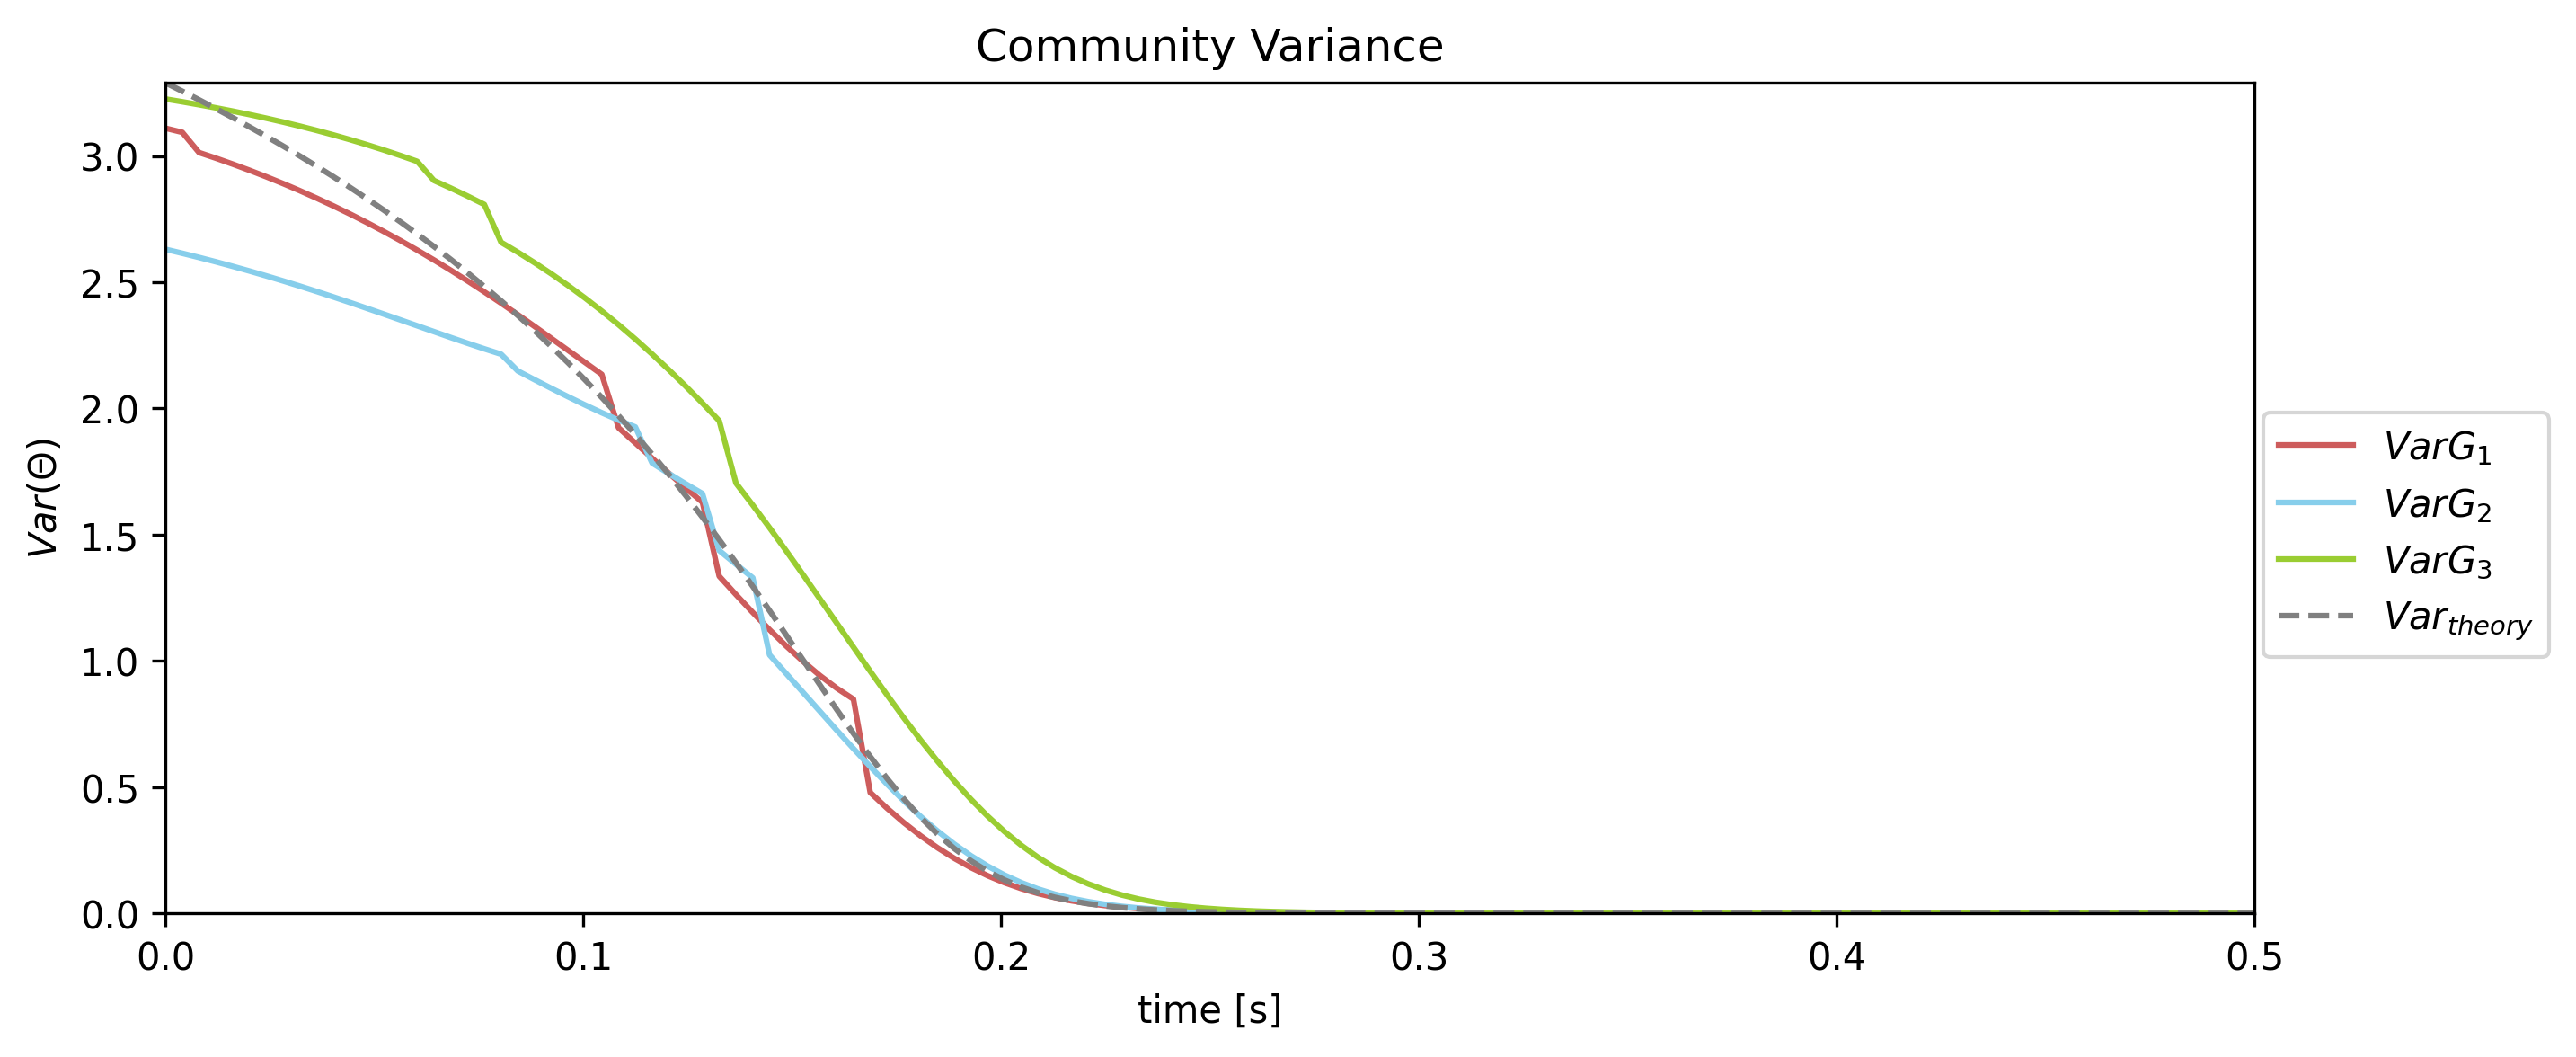

In [ ]:
var_0 = ((2*np.pi)**2)/12
sol_var_theory = solve_ivp(dv_dom_gauss_KSB, [t[0], t[-1]], [var_0], t_eval=t)

plt.figure(figsize=(10, 4), dpi=300)
colors = ['indianred', 'skyblue', 'yellowgreen']
for i in range(n):
    plt.plot(t, np.var(np.angle(np.exp(1j*sol.y[i*N_c:(i+1)*N_c])), axis=0), label=r'$VarG_{}$'.format(i+1), c=colors[i])

plt.plot(t, sol_var_theory.y[0], label=r'$Var_{theory}$', c='gray', linestyle='dashed')
            
plt.xlabel('time [s]')
plt.ylabel(r'$Var(\Theta)$')
plt.legend(bbox_to_anchor=(1.15, .625))
plt.xlim(0,0.5)
plt.ylim(0, ((2*np.pi)**2)/12)
plt.title(r'Community Variance')

In [14]:
t_crit = np.min(t[sol_var_theory.y[0]<= 1/(N_c**2)])
print(r't_crit={}'.format(t_crit))

t_crit=0.28112449799196787


# Mean-Field KSBM

In [15]:
t_lin = np.linspace(0, 10, 500)
i_start = int(250*0.3/1)

MF_mat = 2*kappa/(N*(n))*np.ones((n,n))   

MF_model = Kuramoto(n, MF_mat, mu=0, sigma=0, frequencies=freq, seed=seed)
MF_model.thetas_0 = np.array([np.angle(np.mean(np.exp(1j*sol.y[:N_c,i_start]))), np.angle(np.mean(np.exp(1j*sol.y[N_c:2*N_c,i_start]))), np.angle(np.mean(np.exp(1j*sol.y[2*N_c:,i_start])))])
MF_sol = MF_model.simulate(t_lin)

(-1.0, 1.0)

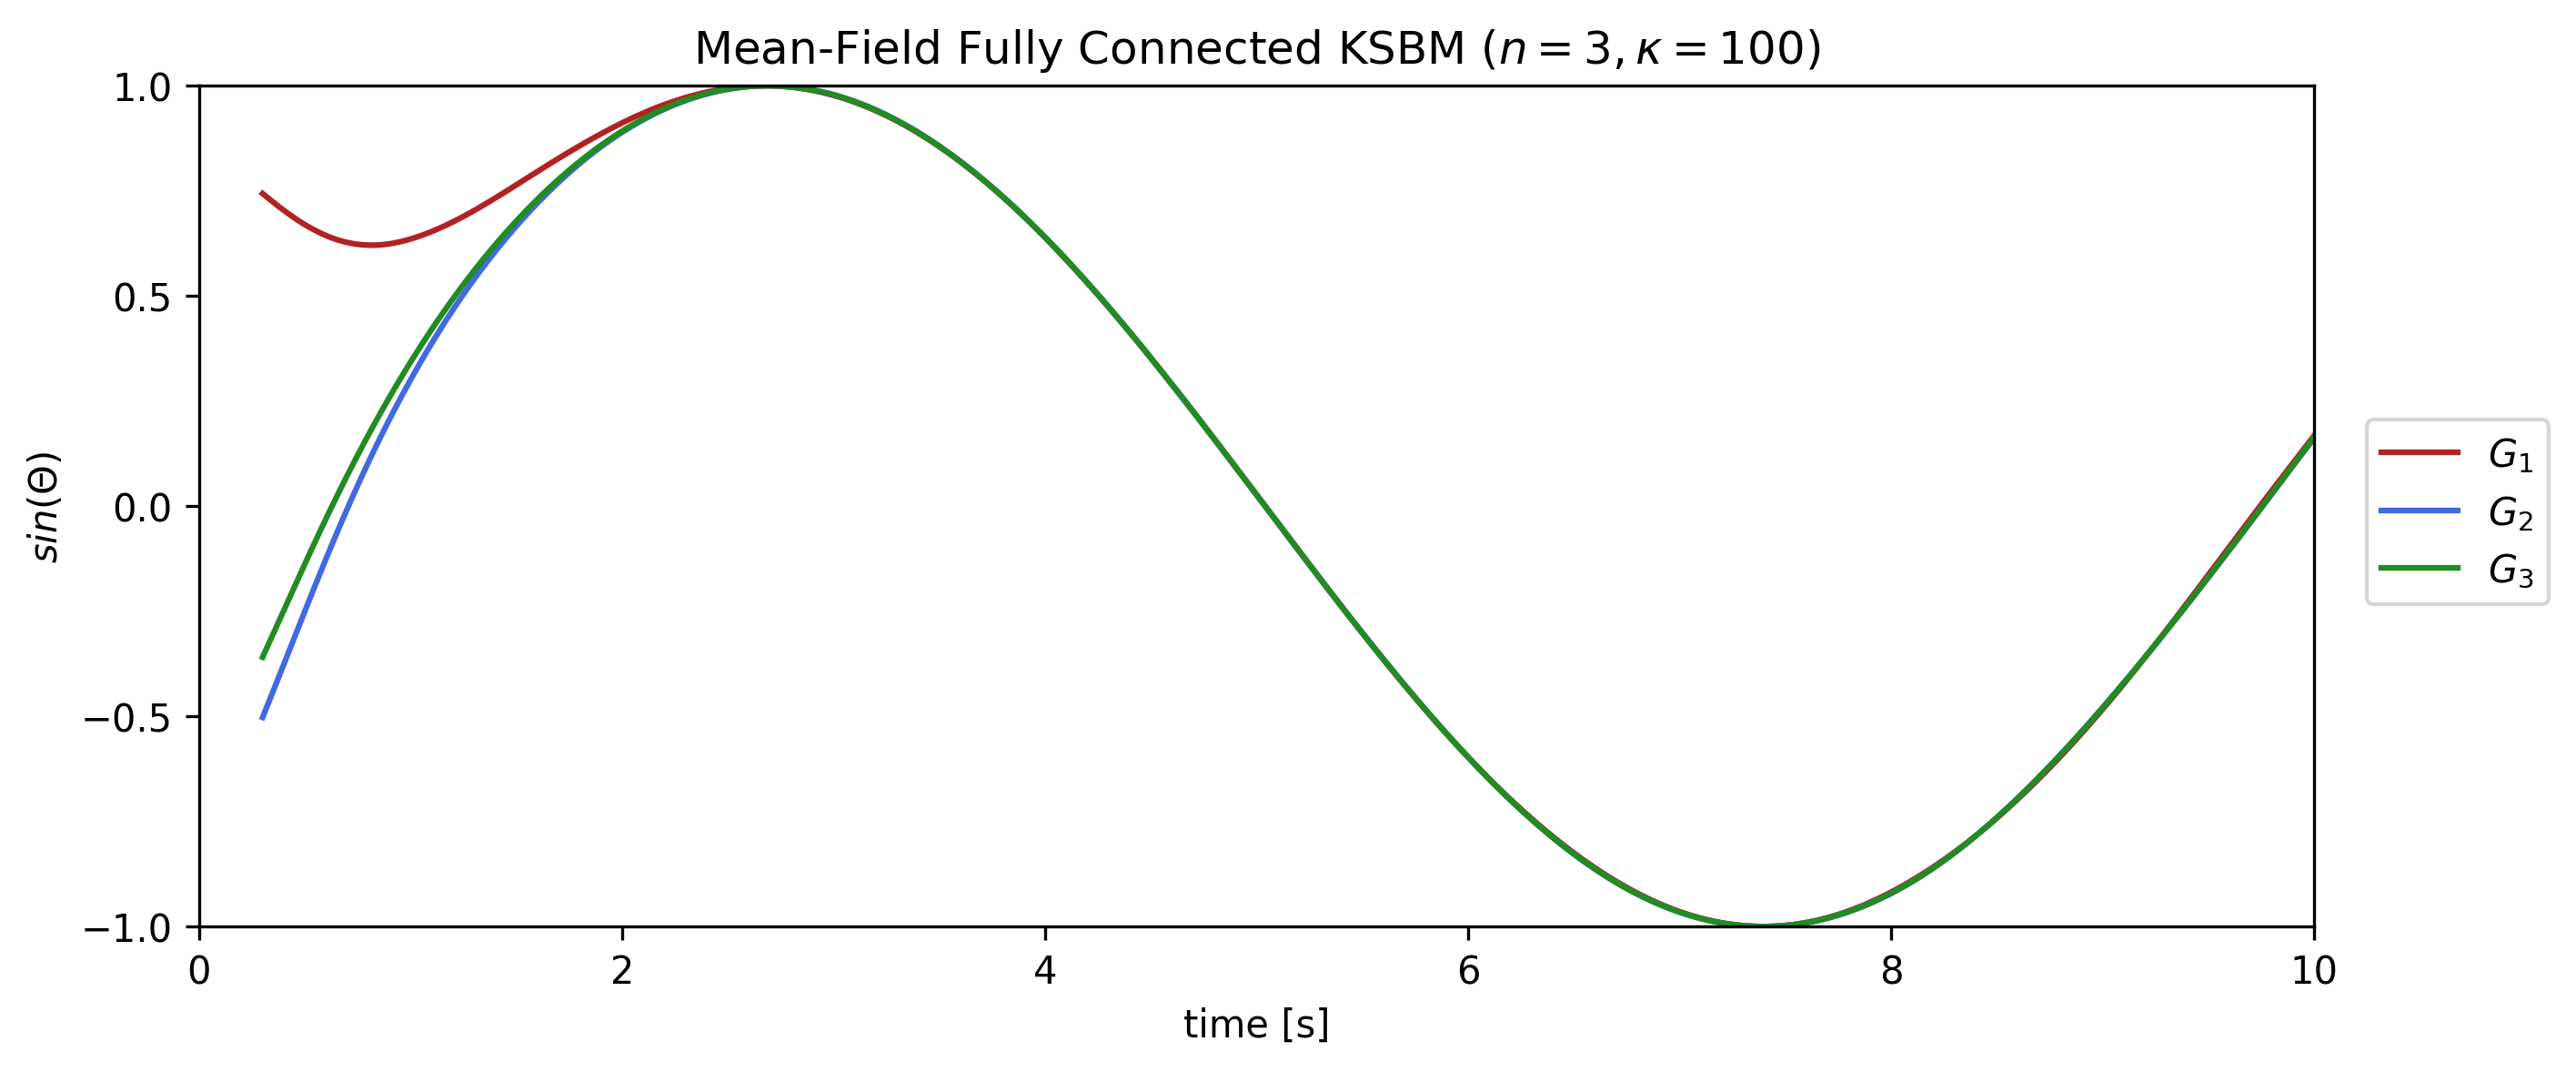

In [16]:
plt.figure(figsize=(10, 4), dpi=300)
MF_colors = ['firebrick', 'royalblue', 'forestgreen']
for i in range(n):
    plt.plot(0.3 + t_lin, np.sin(MF_sol.y[i]), label=r'$G_{}$'.format(i+1), c=MF_colors[i])
            
plt.xlabel('time [s]')
plt.ylabel(r'$sin(\Theta)$')
plt.legend(bbox_to_anchor=(1.12, .625))

plt.title(r'Mean-Field Fully Connected KSBM ($n=3,\kappa=100$)')
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xlim(0,10)
plt.ylim(-1,1)

Text(0.5, 1.0, 'Fully Connected KSBM ($N=99,n=3,\\kappa=100,\\sigma=0.1$)')

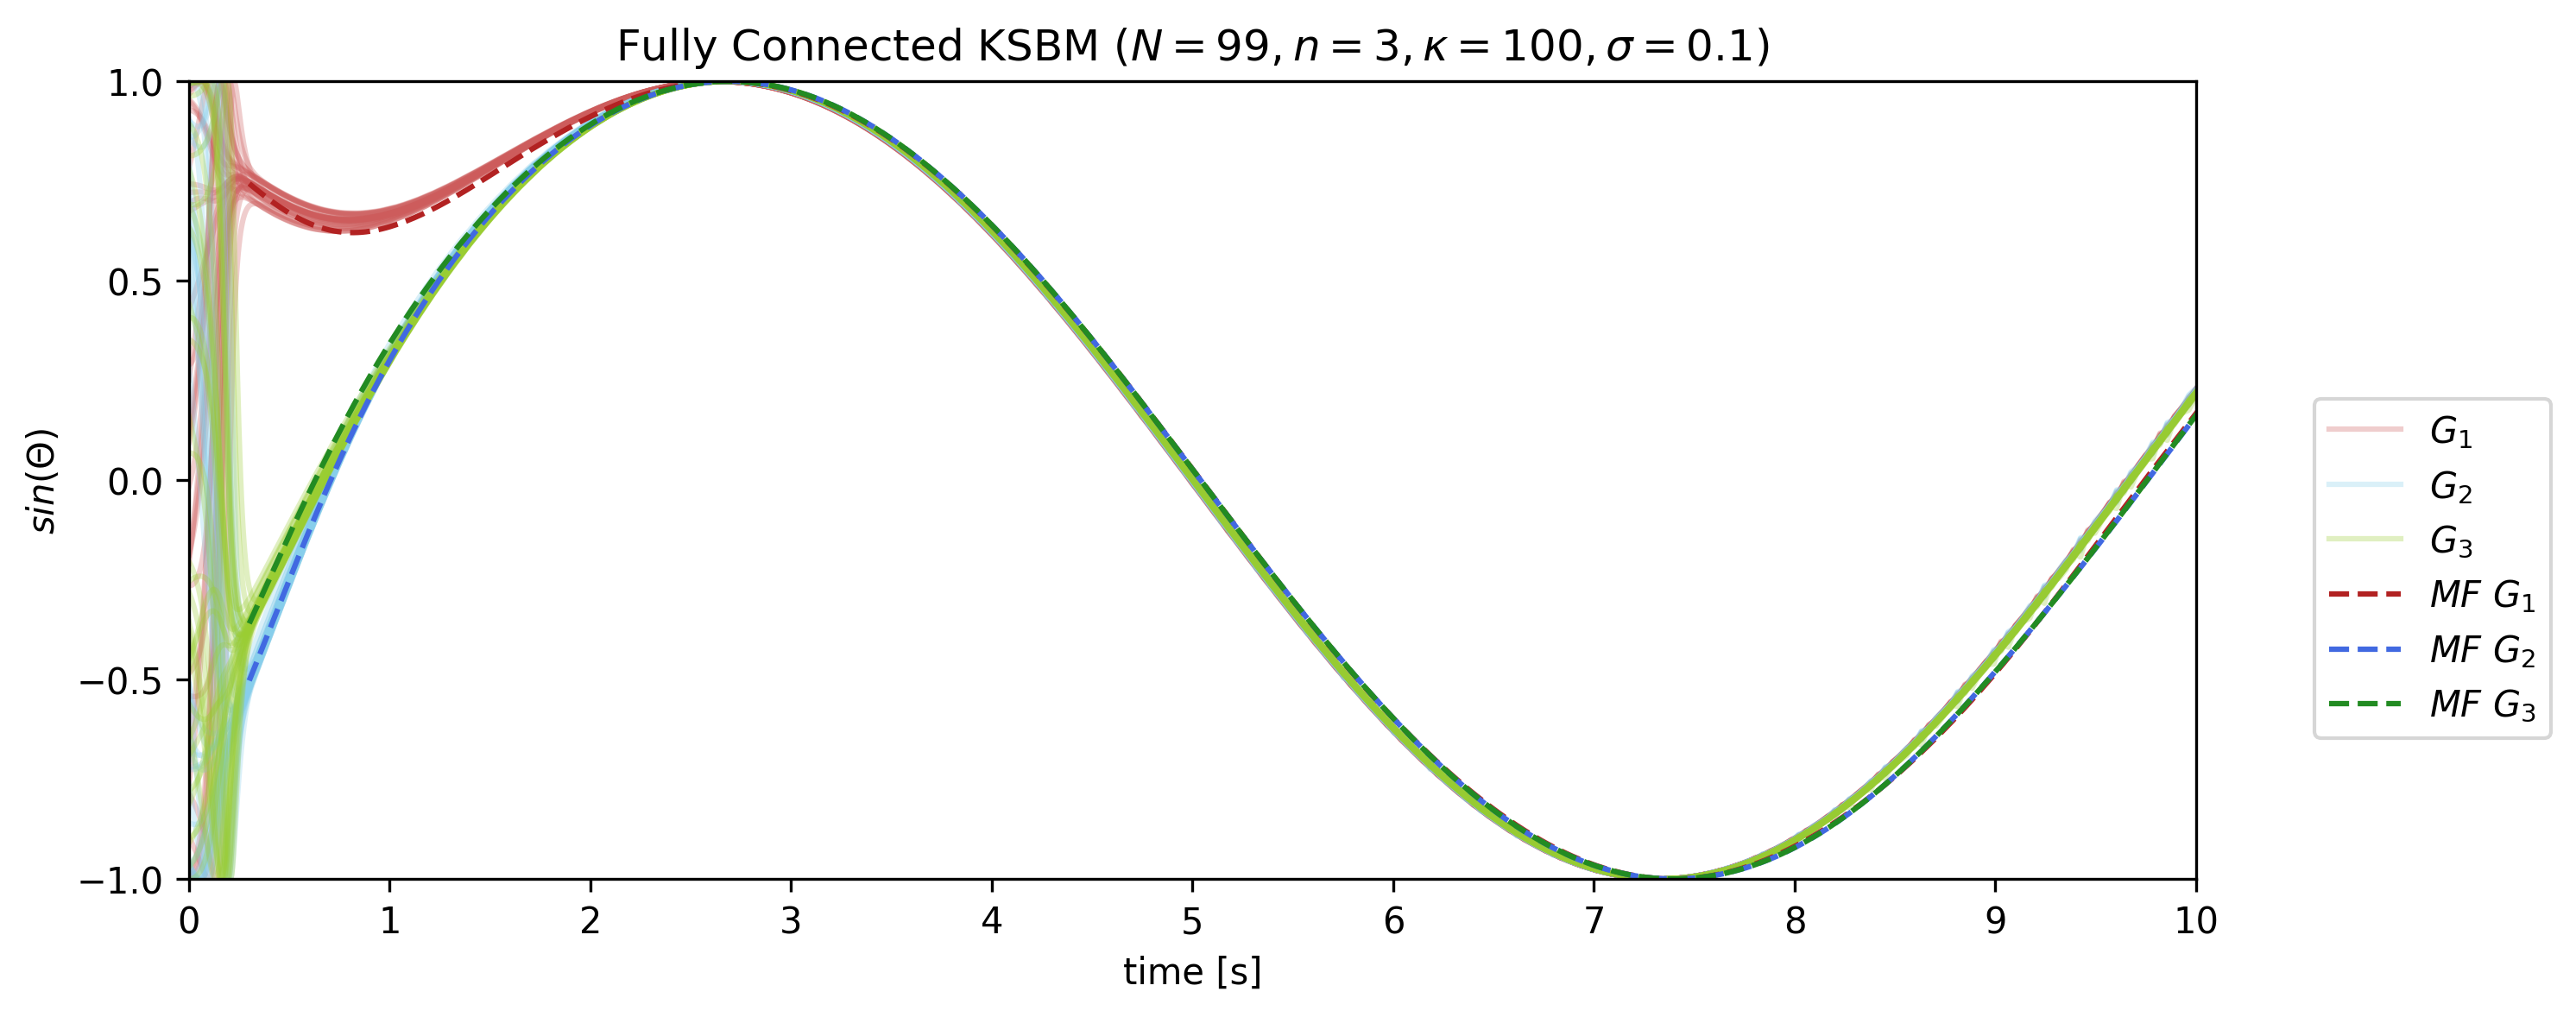

In [17]:
plt.figure(figsize=(10, 4), dpi=300)
colors = ['indianred', 'skyblue', 'yellowgreen']
MF_colors = ['firebrick', 'royalblue', 'forestgreen']
for i in range(n):
    for j in range(N_c):
        if j == 0:
            plt.plot(t, np.sin(sol.y[i*N_c]), label=r'$G_{}$'.format(i+1), c=colors[i], alpha=10/N_c)
        else:
            plt.plot(t, np.sin(sol.y[i*N_c + j]), c=colors[i], alpha=10/N_c)

for i in range(n):
    plt.plot(0.3 + t_lin, np.sin(MF_sol.y[i]), label=r'$MF \ G_{}$'.format(i+1), c=MF_colors[i], linestyle='dashed')
            
plt.xlabel('time [s]')
plt.ylabel(r'$sin(\Theta)$')
plt.legend(bbox_to_anchor=(1.05, .625))

plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xticks(np.arange(0, 10.1, step=1))
plt.xlim(0,10)
plt.ylim(-1,1)
plt.title(r'Fully Connected KSBM ($N=99,n=3,\kappa=100,\sigma=0.1$)')

# Gaussian KSBM

In [18]:
def dx_gauss_KSBM(t, x):
    L = x.shape[0]
    thetas = x[:L//2]
    v = x[L//2:]
    
    dthetas = freq + (2*kappa/(N*(n)))*np.sum(np.array([[np.exp(-0.5*(v_r+v_i))*np.sin(theta_r - theta_i) for theta_r, v_r in zip(thetas, v)]for theta_i, v_i in zip(thetas, v)]), axis=1)
    dv = (np.pi *n*0.1**2)/kappa-(np.exp(-v)*kappa*2*v/n) - (4*kappa/(N*(n)))*np.exp(-0.5*v)*v*np.sum(np.array([[np.exp(-0.5*v_r)*np.cos(theta_r - theta_i) for theta_r, v_r in zip(thetas, v)]for theta_i, v_i in zip(thetas, v)]), axis=1)
    return np.concatenate((dthetas, dv)) 

In [19]:
var_0 = ((2*np.pi)**2)/12
mean_0 = np.array([np.angle(np.mean(np.exp(1j*sol.y[:N_c,0]))), np.angle(np.mean(np.exp(1j*sol.y[N_c:2*N_c,0]))), np.angle(np.mean(np.exp(1j*sol.y[2*N_c:,0])))])
gauss_sol = solve_ivp(dx_gauss_KSBM, [t[0], t[-1]], [mean_0[0], mean_0[1], mean_0[2], var_0, var_0, var_0], t_eval=t_lin)

C:\Users\arthu\AppData\Local\Temp\ipykernel_15240\2193674471.py:6: RuntimeWarning: overflow encountered in exp
  dthetas = freq + (2*kappa/(N*(n)))*np.sum(np.array([[np.exp(-0.5*(v_r+v_i))*np.sin(theta_r - theta_i) for theta_r, v_r in zip(thetas, v)]for theta_i, v_i in zip(thetas, v)]), axis=1)
C:\Users\arthu\AppData\Local\Temp\ipykernel_15240\2193674471.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  dthetas = freq + (2*kappa/(N*(n)))*np.sum(np.array([[np.exp(-0.5*(v_r+v_i))*np.sin(theta_r - theta_i) for theta_r, v_r in zip(thetas, v)]for theta_i, v_i in zip(thetas, v)]), axis=1)
c:\Users\arthu\Anaconda3\envs\KSBM-path-signatures\lib\site-packages\numpy\_core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\arthu\AppData\Local\Temp\ipykernel_15240\2193674471.py:7: RuntimeWarning: overflow encountered in exp
  dv = (np.pi *n*0.1**2)/kappa-(np.exp(-v)*kappa*2*v/n) - (4*kappa/(N

(0.0, 10.0)

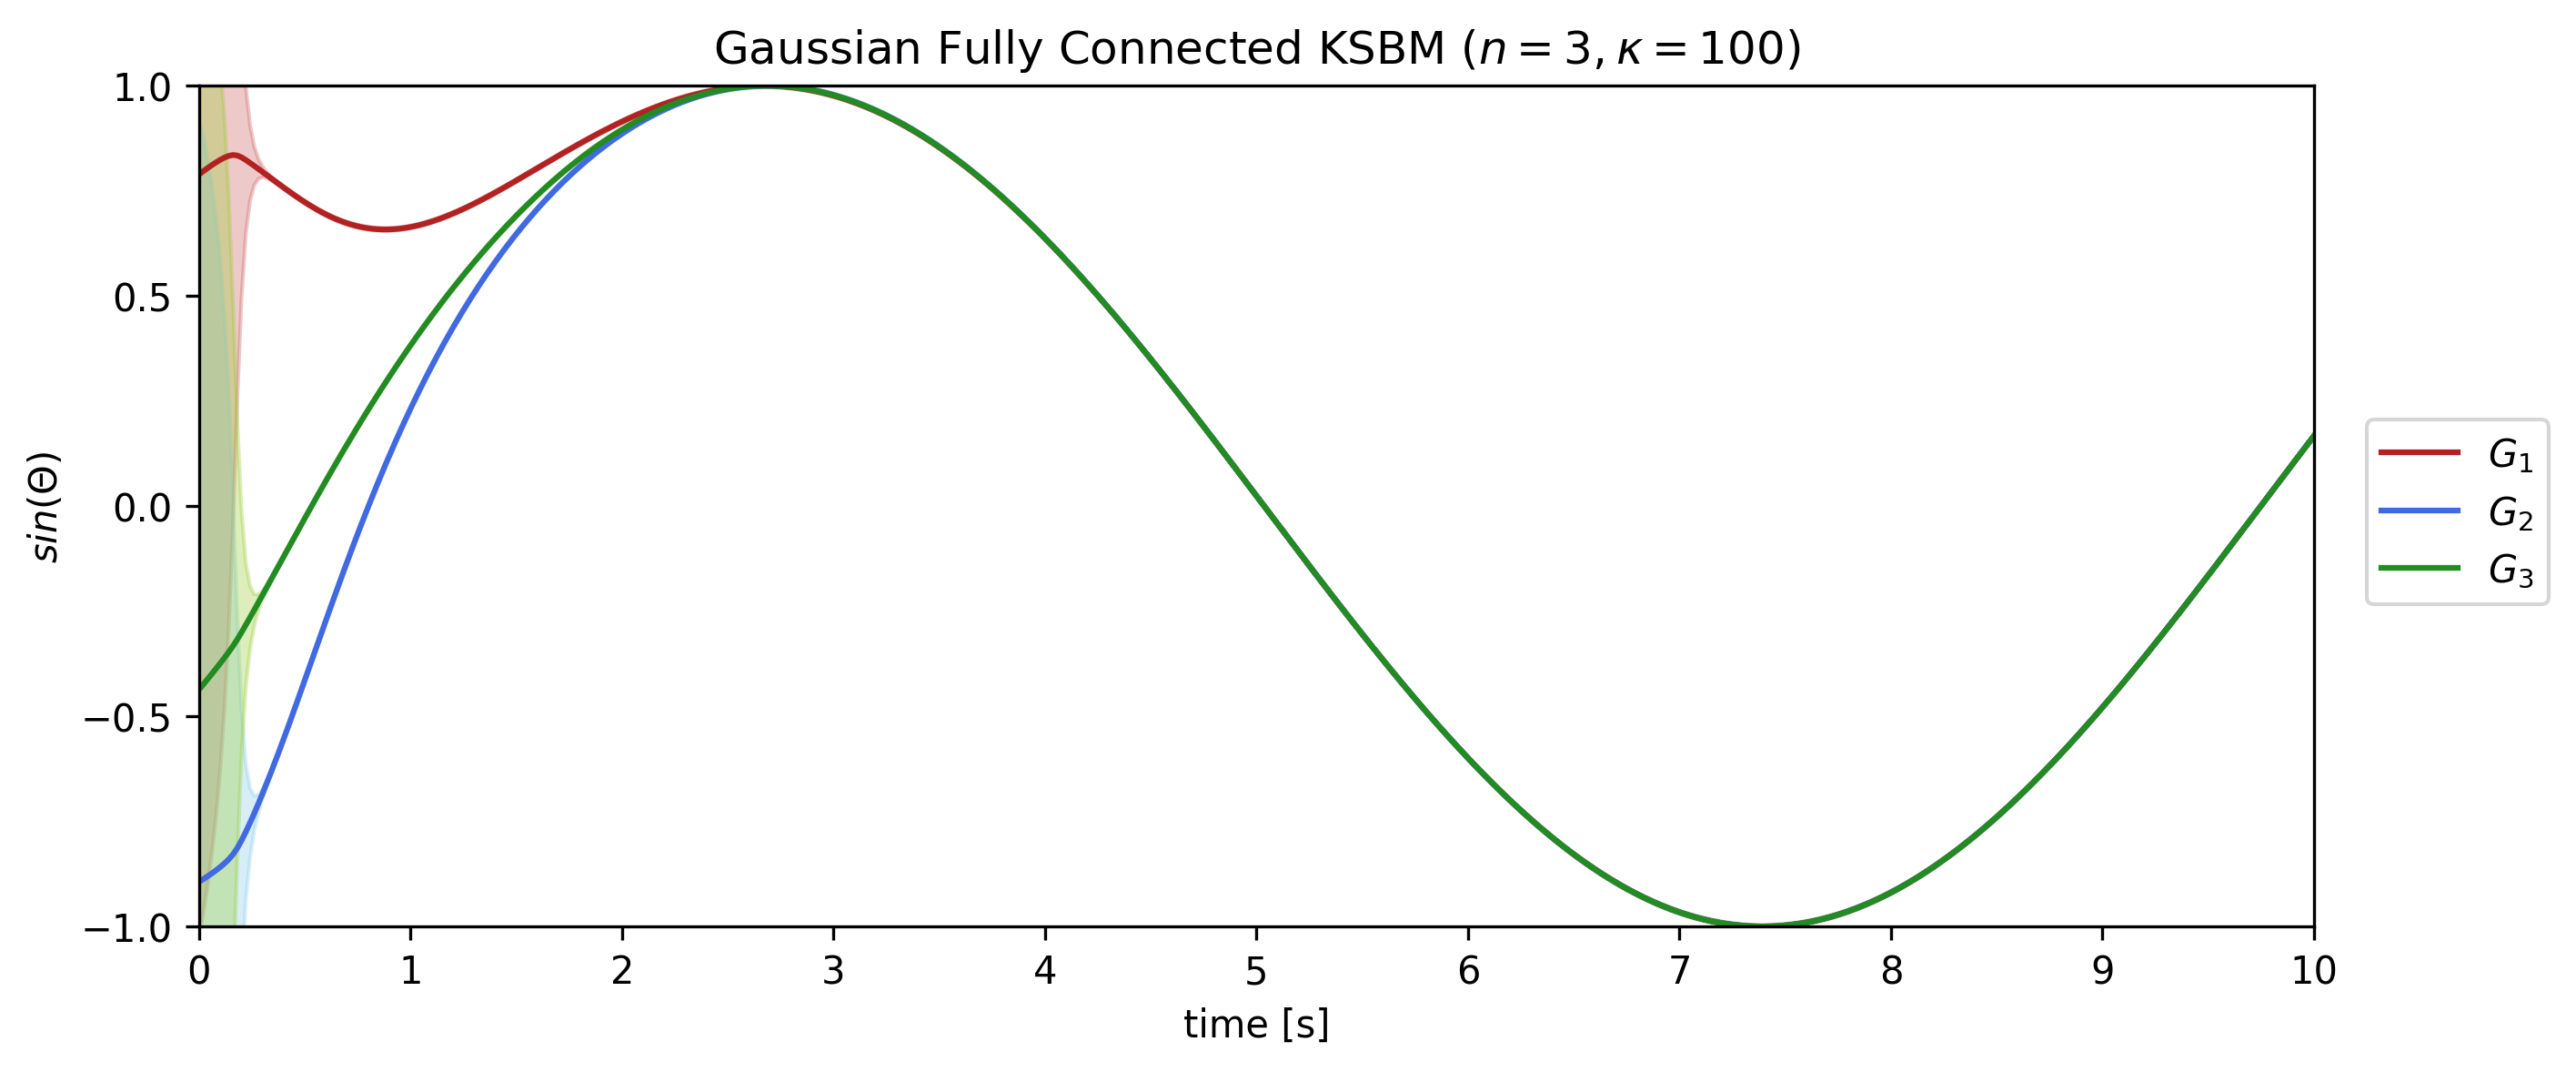

In [20]:
plt.figure(figsize=(10, 4), dpi=300)
colors = ['indianred', 'skyblue', 'yellowgreen']
MF_colors = ['firebrick', 'royalblue', 'forestgreen']
for i in range(n):
    plt.plot(t_lin, np.sin(gauss_sol.y[i]), label=r'$G_{}$'.format(i+1), c=MF_colors[i])
    plt.fill_between(t_lin, np.sin(gauss_sol.y[i]) - np.sqrt(gauss_sol.y[i+n]), np.sin(gauss_sol.y[i]) + np.sqrt(gauss_sol.y[i+n]), color=colors[i],alpha=0.33)
            
plt.xlabel('time [s]')
plt.ylabel(r'$sin(\Theta)$')
plt.legend(bbox_to_anchor=(1.12, .625))

plt.title(r'Gaussian Fully Connected KSBM ($n=3,\kappa=100$)')
plt.xticks(np.arange(0, 10.1, step=1))
plt.yticks(np.arange(-1,1.1,step=0.5))
plt.ylim(-1, 1)
plt.xlim(0,10)

Text(0.5, 1.0, 'Fully Connected KSBM ($N=99,n=3,\\kappa=100,\\sigma=0.1$)')

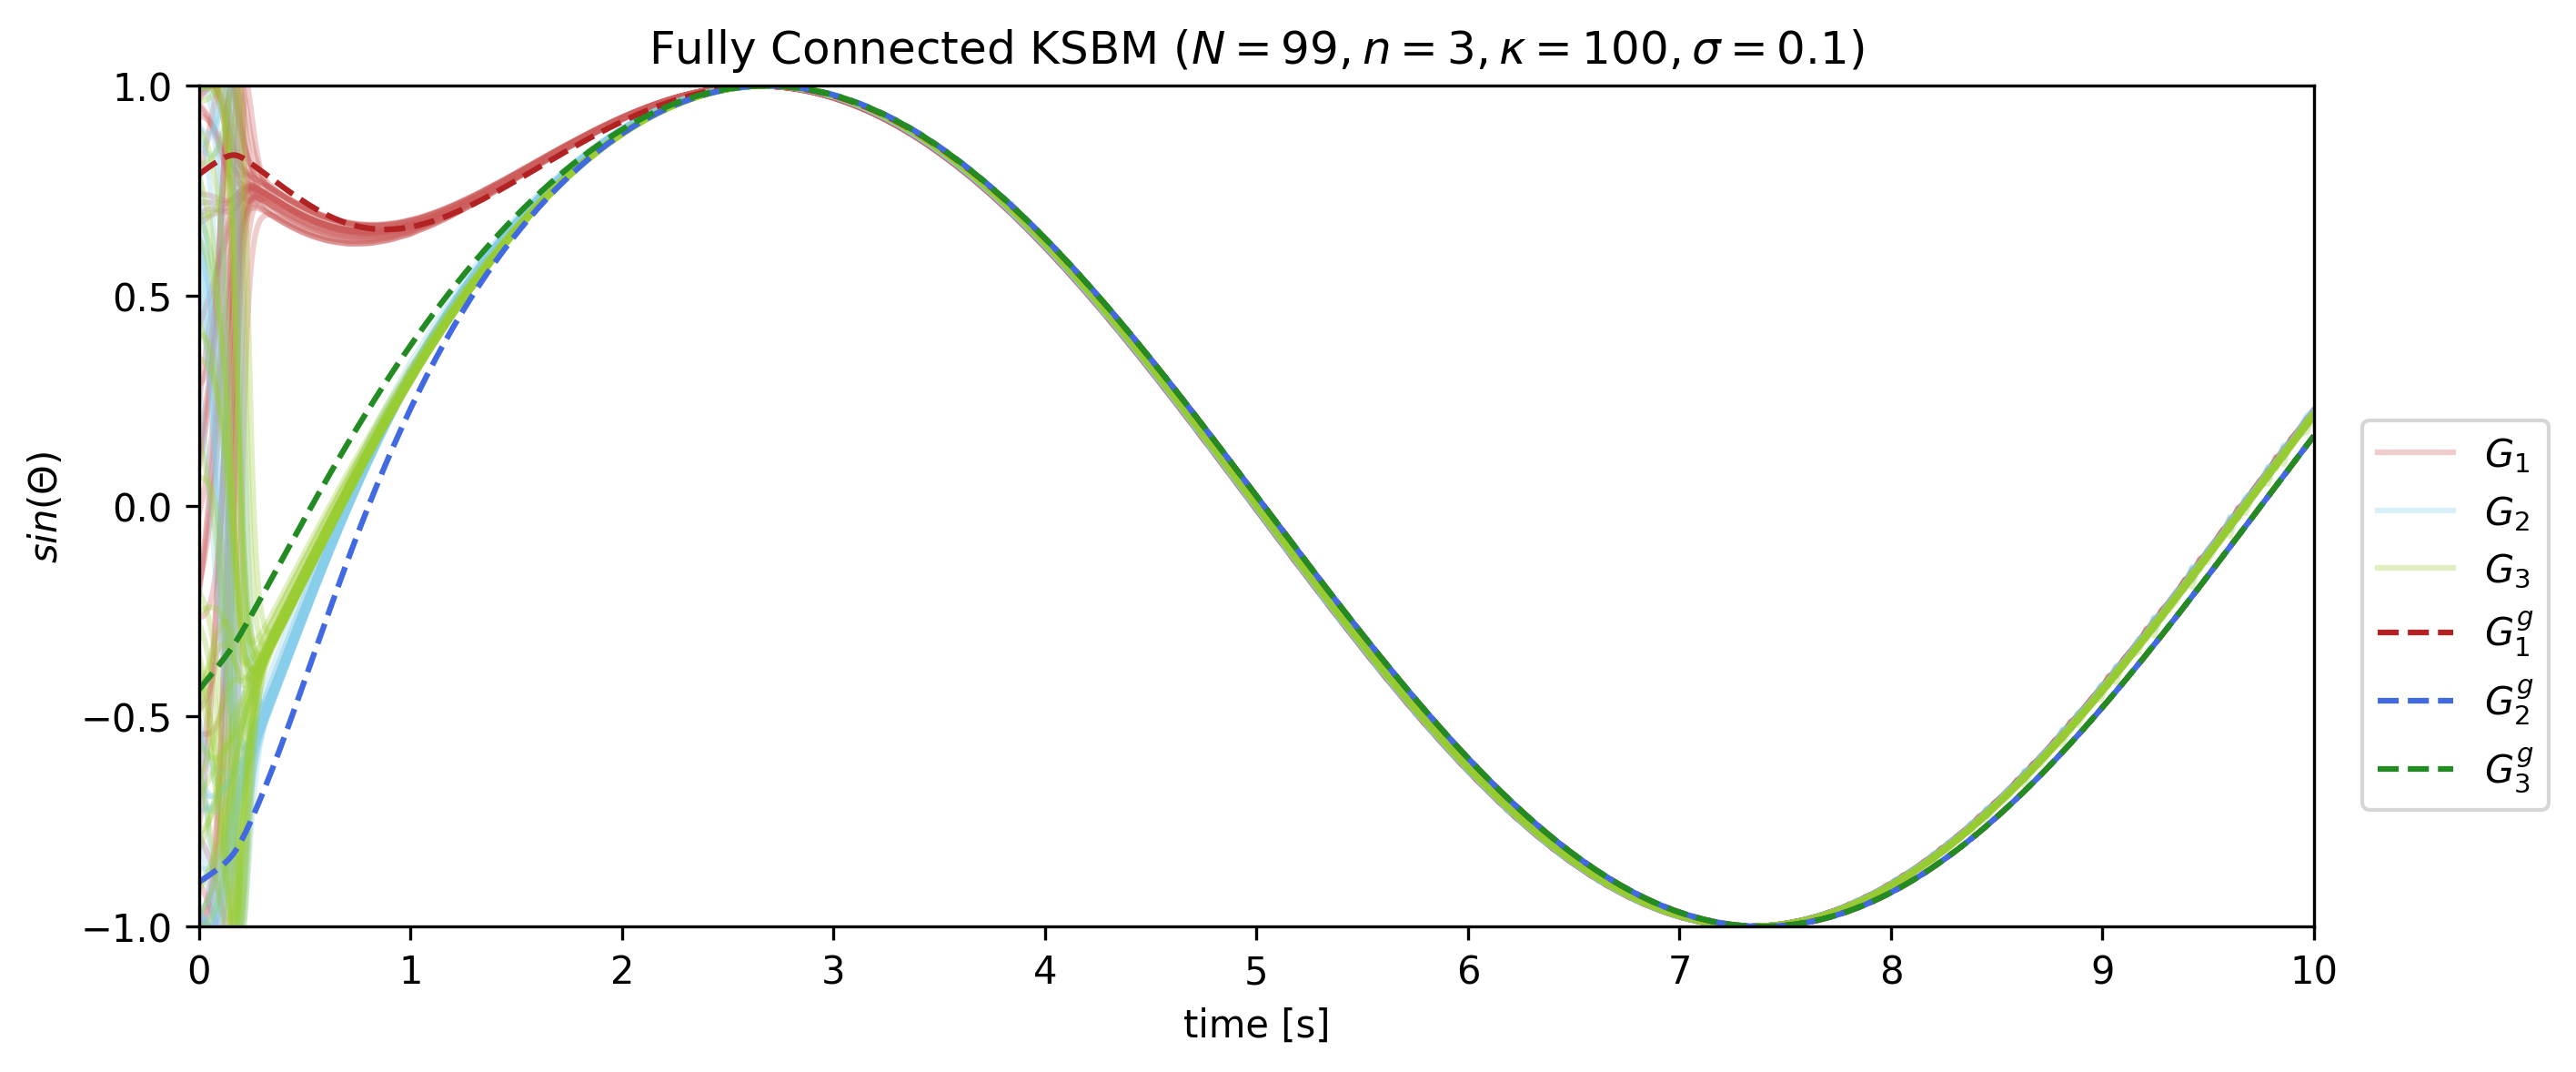

In [21]:
plt.figure(figsize=(10, 4), dpi=300)
colors = ['indianred', 'skyblue', 'yellowgreen']
MF_colors = ['firebrick', 'royalblue', 'forestgreen']
for i in range(n):
    for j in range(N_c):
        if j == 0:
            plt.plot(t, np.sin(sol.y[i*N_c]), label=r'$G_{}$'.format(i+1), c=colors[i], alpha=10/N_c)
        else:
            plt.plot(t, np.sin(sol.y[i*N_c + j]), c=colors[i], alpha=10/N_c)

for i in range(n):
    plt.plot(t_lin, np.sin(gauss_sol.y[i]), label=r'$G^g_{}$'.format(i+1), c=MF_colors[i], linestyle='dashed')
            
plt.xlabel('time [s]')
plt.ylabel(r'$sin(\Theta)$')
plt.legend(bbox_to_anchor=(1.12, .625))

plt.yticks(np.arange(-1,1.1,step=0.5))
plt.xticks(np.arange(0, 10.1, step=1))
plt.xlim(0,10)
plt.ylim(-1,1)
plt.title(r'Fully Connected KSBM ($N=99,n=3,\kappa=100,\sigma=0.1$)')

Text(0.5, 1.0, 'Community Variance')

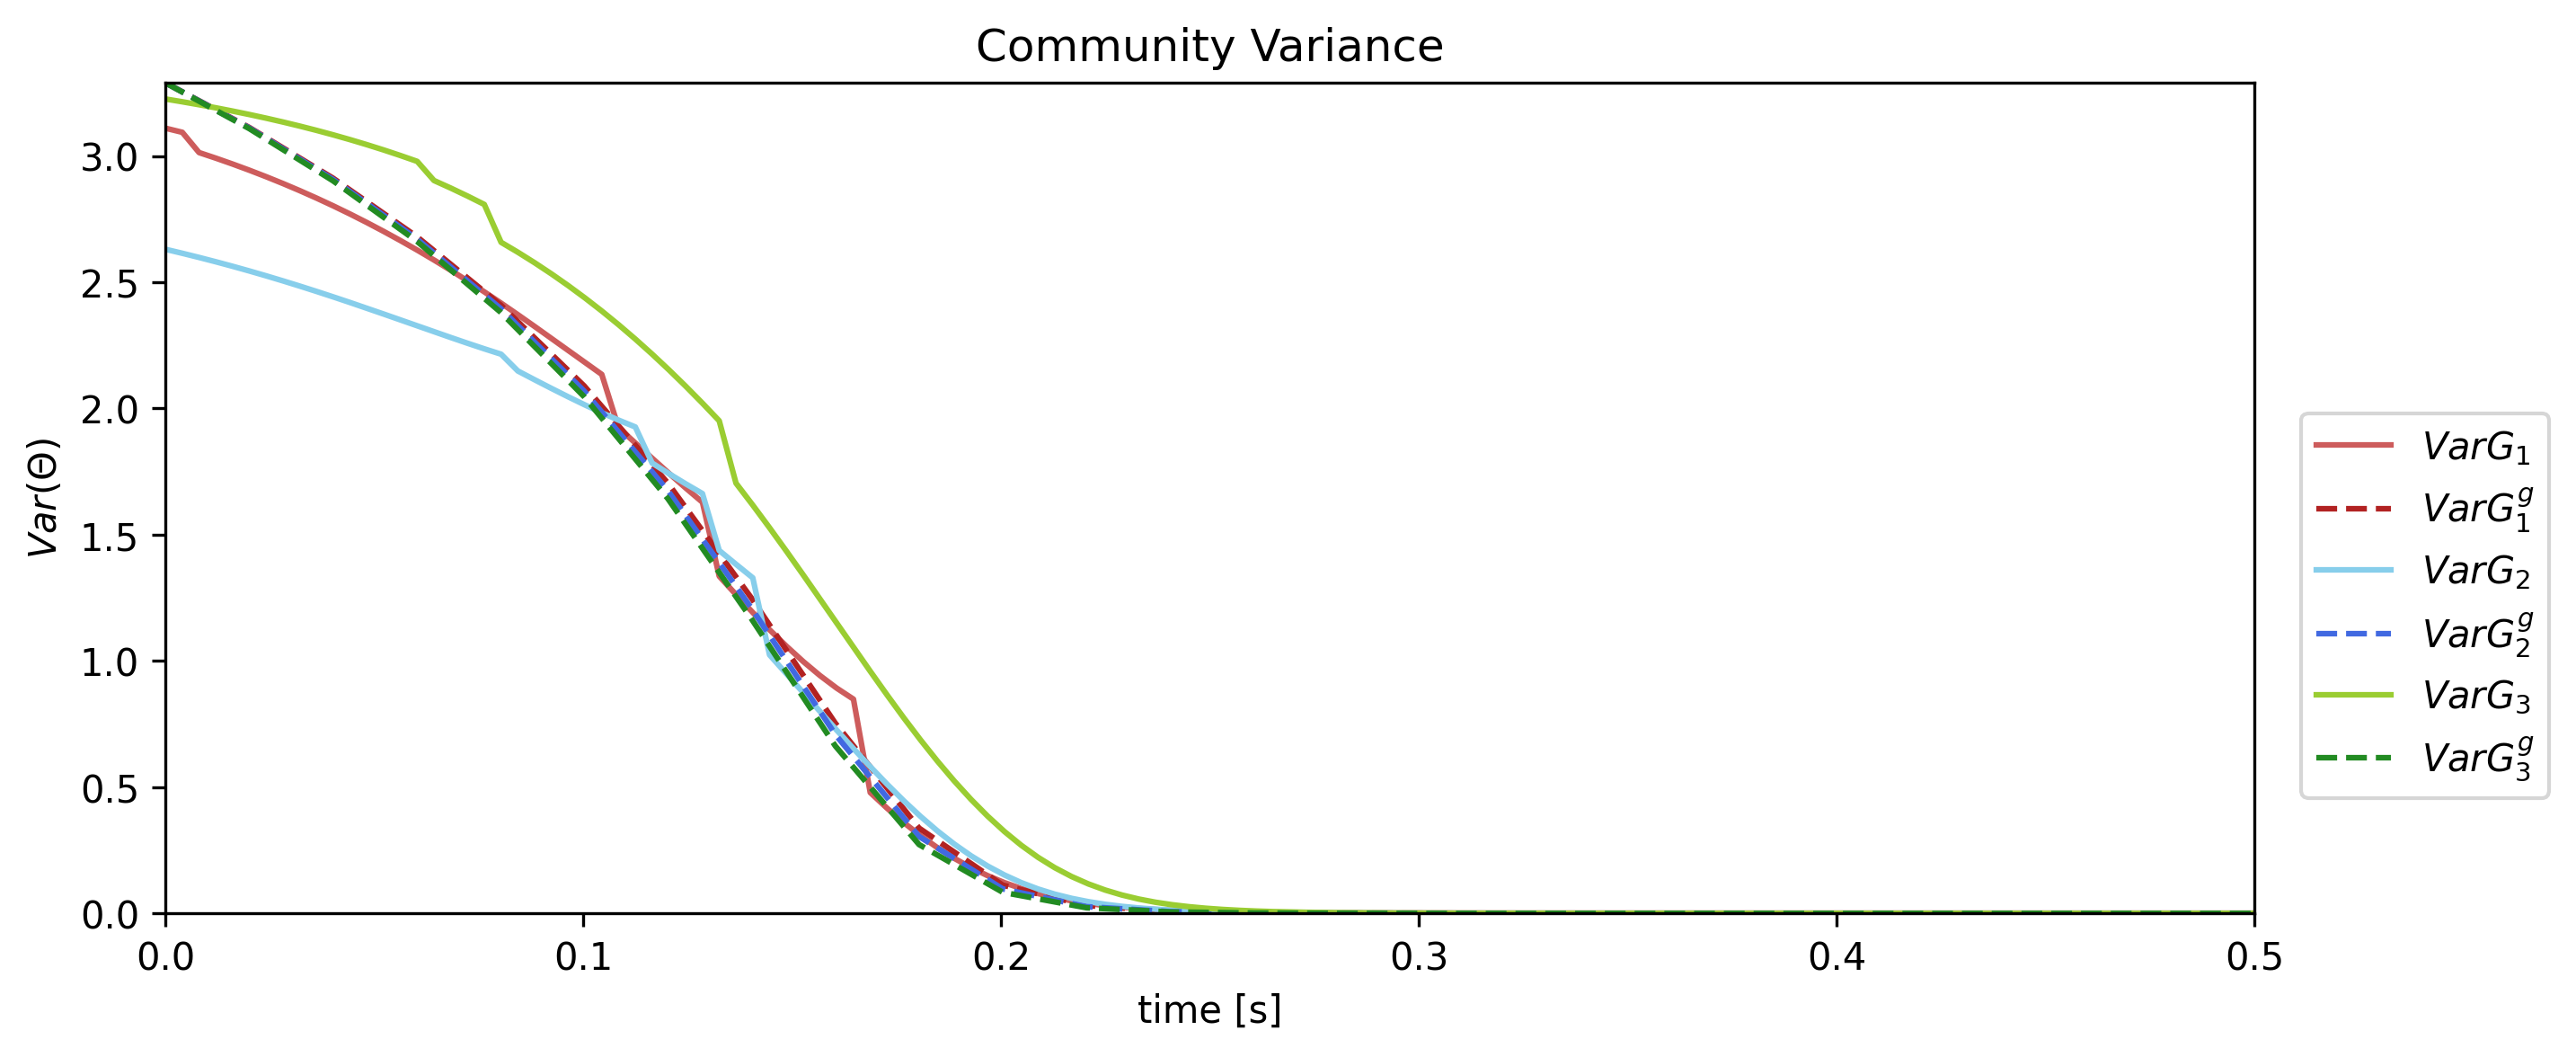

In [ ]:
plt.figure(figsize=(10, 4), dpi=300)
colors = ['indianred', 'skyblue', 'yellowgreen']
MF_colors = ['firebrick', 'royalblue', 'forestgreen']
for i in range(n):
    plt.plot(t, np.var(np.angle(np.exp(1j*sol.y[i*N_c:(i+1)*N_c])), axis=0), label=r'$VarG_{}$'.format(i+1), c=colors[i])
    plt.plot(t_lin, gauss_sol.y[i+n], label=r'$VarG^g_{}$'.format(i+1), c=MF_colors[i], linestyle='dashed')
            
plt.xlabel('time [s]')
plt.ylabel(r'$Var(\Theta)$')
plt.legend(bbox_to_anchor=(1.15, .625))
plt.xlim(0,0.5)
plt.ylim(0, ((2*np.pi)**2)/12)
plt.title(r'Community Variance')